<a href="https://colab.research.google.com/github/rojan-herald/ai_assessment/blob/main/2507008_RojanAcharya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HDI Data Analysis Assignment
## Statistical Interpretation and Exploratory Data Analysis

**Course**: Concepts and Technologies of AI (5CS037)  
**Assignment**: Analysis of the Human Development Index (HDI)  
**Dataset**: Human Development Index Dataset (1990-2022)

This notebook contains complete analysis for:
- Problem 1A: Single Year HDI Exploration (2022)
- Problem 1B: HDI Visualization and Trend Analysis (2020-2022)
- Problem 2: Advanced HDI Exploration (South Asia)
- Problem 3: Comparative Regional Analysis (South Asia vs Middle East)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print("Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {plt.matplotlib.__version__}")
print(f"Seaborn version: {sns.__version__}")


Libraries imported successfully!
Pandas version: 2.2.2
NumPy version: 2.0.2
Matplotlib version: 3.10.0
Seaborn version: 0.13.2


In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Concepts and technologies of AI/Human_Development_Index_Dataset.csv', encoding='latin1')

# Initial data inspection
print("Dataset loaded successfully!")
print(f"\nDataset shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print("\nFirst few rows:")
df.head()

Dataset loaded successfully!

Dataset shape: (6798, 30)
Number of rows: 6798
Number of columns: 30

First few rows:


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,expec_yr_school,expec_yr_school_f,expec_yr_school_m,mean_yr_school,mean_yr_school_f,mean_yr_school_m,gross_inc_percap,gross_inc_percap_f,gross_inc_percap_m,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
0,1,AFG,Afghanistan,1990,0.284,45.967,10.694796,NaN,NaN,48.397,43.709,2.936460,2.117230,4.532768,0.871962,0.201659,1.493952,3115.670448,NaN,NaN,NaN,NaN,1.107733,7.899011,NaN,NaN,NaN,NaN,0.189279,2.1809
1,2,AFG,Afghanistan,1991,0.292,46.663,10.745167,NaN,NaN,49.144,44.353,3.228456,2.246242,4.768261,0.915267,0.218944,1.578809,2817.304736,NaN,NaN,NaN,NaN,1.221396,8.137953,NaN,NaN,NaN,NaN,0.178155,2.5264
2,3,AFG,Afghanistan,1992,0.299,47.596,12.057433,NaN,NaN,50.320,45.070,3.520452,2.383115,5.015989,0.958573,0.236229,1.663665,2474.681985,NaN,NaN,NaN,NaN,1.335059,8.376896,NaN,NaN,NaN,NaN,0.122920,2.6421
3,4,AFG,Afghanistan,1993,0.307,51.466,14.003760,NaN,NaN,52.739,50.216,3.812448,2.528328,5.276587,1.001878,0.253514,1.748522,1723.019763,NaN,NaN,NaN,NaN,1.448722,8.615838,NaN,NaN,NaN,NaN,0.106179,2.3022
4,5,AFG,Afghanistan,1994,0.300,51.495,15.455554,NaN,NaN,53.544,49.531,4.104445,2.682390,5.550723,1.045184,0.270800,1.833378,1202.010488,NaN,NaN,NaN,NaN,1.562385,8.854780,NaN,NaN,NaN,NaN,0.094063,1.8948


In [ ]:
# Check column names and data types
print("Column names and data types:")
print(df.dtypes)
print("\nColumn names list:")
print(df.columns.tolist())


Column names and data types:
Unnamed: 0                     int64
iso3                          object
country                       object
year                           int64
hdi                          float64
life_expectancy              float64
pop_millions                 float64
hdi_f                        float64
hdi_m                        float64
life_expec_f                 float64
life_expec_m                 float64
expec_yr_school              float64
expec_yr_school_f            float64
expec_yr_school_m            float64
mean_yr_school               float64
mean_yr_school_f             float64
mean_yr_school_m             float64
gross_inc_percap             float64
gross_inc_percap_f           float64
gross_inc_percap_m           float64
gender_development           float64
gender_inequality            float64
secondary_education_f_%      float64
secondary_education_m_%      float64
seats_in_parliament_f_%      float64
seats_in_parliament_m_%      float64
labour_pa

In [ ]:
# Check unique years in the dataset
unique_years = sorted(df['year'].unique())
print(f"Years in dataset: {unique_years}")
print(f"Year range: {min(unique_years)} to {max(unique_years)}")
print(f"Total unique years: {len(unique_years)}")


Years in dataset: [np.int64(1990), np.int64(1991), np.int64(1992), np.int64(1993), np.int64(1994), np.int64(1995), np.int64(1996), np.int64(1997), np.int64(1998), np.int64(1999), np.int64(2000), np.int64(2001), np.int64(2002), np.int64(2003), np.int64(2004), np.int64(2005), np.int64(2006), np.int64(2007), np.int64(2008), np.int64(2009), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022)]
Year range: 1990 to 2022
Total unique years: 33


---

# Problem 1A: Single Year HDI Exploration (Latest Year: 2022)

## Task 1: Extract Latest Year


In [ ]:
# Task 1: Extract Latest Year (2022)
# Identify unique years
unique_years = sorted(df['year'].unique())
print(f"Unique years in dataset: {unique_years}")
print(f"Latest year: {max(unique_years)}")

# Filter dataset for year 2022
hdi_2022_df = df[df['year'] == 2022].copy()

print(f"\nFiltered dataset shape for 2022: {hdi_2022_df.shape}")
print(f"Number of countries in 2022: {len(hdi_2022_df)}")


Unique years in dataset: [np.int64(1990), np.int64(1991), np.int64(1992), np.int64(1993), np.int64(1994), np.int64(1995), np.int64(1996), np.int64(1997), np.int64(1998), np.int64(1999), np.int64(2000), np.int64(2001), np.int64(2002), np.int64(2003), np.int64(2004), np.int64(2005), np.int64(2006), np.int64(2007), np.int64(2008), np.int64(2009), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022)]
Latest year: 2022

Filtered dataset shape for 2022: (206, 30)
Number of countries in 2022: 206


## Task 2: Data Exploration


In [ ]:
# Task 2: Data Exploration
print("First 10 rows of 2022 dataset:")
display(hdi_2022_df.head(10))

print(f"\nNumber of rows: {hdi_2022_df.shape[0]}")
print(f"Number of columns: {hdi_2022_df.shape[1]}")

print("\nColumn names:")
print(hdi_2022_df.columns.tolist())

print("\nData types:")
print(hdi_2022_df.dtypes)


First 10 rows of 2022 dataset:


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,expec_yr_school,expec_yr_school_f,expec_yr_school_m,mean_yr_school,mean_yr_school_f,mean_yr_school_m,gross_inc_percap,gross_inc_percap_f,gross_inc_percap_m,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
32,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,59.766,10.705385,8.053257,13.228449,2.514790,1.174130,3.912740,1335.205733,395.915459,2256.217507,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
65,66,ALB,Albania,2022,0.789,76.833,2.842321,0.780277,0.798432,79.472,74.502,14.487470,14.681040,14.292200,10.121144,9.811468,10.433855,15293.326510,13198.539560,17398.003690,0.977,0.116,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.7367
98,99,DZA,Algeria,2022,0.745,77.129,44.903225,0.681844,0.773800,78.457,75.853,15.487880,16.264179,14.743880,6.987444,6.490568,7.481537,10978.405710,3841.656612,17858.790780,0.881,0.460,42.910456,46.815170,7.005254,92.994746,17.57,65.53,4.079540,8.7199
131,132,AND,Andorra,2022,0.884,83.552,0.079824,NaN,NaN,85.838,81.430,12.783780,12.765060,12.810630,11.613440,11.522590,11.704380,54233.449480,NaN,NaN,NaN,NaN,81.718277,84.599998,46.428571,53.571429,NaN,NaN,4.593593,NaN
164,165,AGO,Angola,2022,0.591,61.929,35.588987,0.560890,0.619680,64.541,59.351,12.167600,11.535400,12.909900,5.844292,4.462809,7.187960,5327.788251,4696.356687,5973.845631,0.905,0.520,21.339865,37.411946,33.636364,66.363636,74.73,78.16,0.507359,3.6568
197,198,ATG,Antigua and Barbuda,2022,0.826,79.236,0.093763,NaN,NaN,81.645,76.507,15.512328,16.746290,14.350537,10.546230,10.344223,10.595975,18783.965360,NaN,NaN,NaN,NaN,NaN,NaN,31.428571,68.571429,NaN,NaN,6.401056,NaN
230,231,ARG,Argentina,2022,0.849,76.064,45.510318,0.841405,0.845473,79.277,72.851,18.979509,20.914900,17.130329,11.144080,11.391660,10.857980,22047.971310,16933.062910,27264.830910,0.995,0.292,73.591541,71.648085,44.376900,55.623100,52.08,71.74,4.190779,14.4512
263,264,ARM,Armenia,2022,0.786,73.372,2.780469,0.795110,0.774942,78.447,67.866,14.405610,14.812910,14.022340,11.330300,11.321520,11.341190,15388.299760,13442.501330,17770.415300,1.026,0.198,96.001381,97.050957,35.514019,64.485981,62.80,71.84,2.531088,7.3553
296,297,AUS,Australia,2022,0.946,83.579,26.177414,0.934602,0.955941,85.453,81.708,21.080021,21.981430,20.193760,12.726820,12.810590,12.639710,49257.135200,41131.470850,57495.771580,0.978,0.063,94.580063,94.430069,44.493392,55.506608,62.31,71.13,14.914763,26.9245
329,330,AUT,Austria,2022,0.926,82.412,8.939617,0.911592,0.937756,84.600,80.150,16.367460,16.838499,15.922670,12.305714,12.048949,12.578872,56529.663290,41899.211240,71616.204300,0.972,0.048,100.000000,100.000000,40.983607,59.016393,56.55,66.69,7.399461,27.9621



Number of rows: 206
Number of columns: 30

Column names:
['Unnamed: 0', 'iso3', 'country', 'year', 'hdi', 'life_expectancy', 'pop_millions', 'hdi_f', 'hdi_m', 'life_expec_f', 'life_expec_m', 'expec_yr_school', 'expec_yr_school_f', 'expec_yr_school_m', 'mean_yr_school', 'mean_yr_school_f', 'mean_yr_school_m', 'gross_inc_percap', 'gross_inc_percap_f', 'gross_inc_percap_m', 'gender_development', 'gender_inequality', 'secondary_education_f_%', 'secondary_education_m_%', 'seats_in_parliament_f_%', 'seats_in_parliament_m_%', 'labour_participation_f_%', 'labour_participation_m_%', 'co2_emission_tons', 'mat_footprint_percap_tons']

Data types:
Unnamed: 0                     int64
iso3                          object
country                       object
year                           int64
hdi                          float64
life_expectancy              float64
pop_millions                 float64
hdi_f                        float64
hdi_m                        float64
life_expec_f          

## Task 3: Missing Values & Data Cleaning


In [ ]:
# Task 3: Missing Values & Data Cleaning
# Check for missing values
print("Missing values in each column:")
missing_values = hdi_2022_df.isnull().sum()
print(missing_values[missing_values > 0])

# Check for "NA" strings (which might represent missing data)
print("\nChecking for 'NA' string values:")
na_strings = {}
for col in hdi_2022_df.columns:
    if hdi_2022_df[col].dtype == 'object':
        na_count = (hdi_2022_df[col] == 'NA').sum()
        if na_count > 0:
            na_strings[col] = na_count
print(na_strings)

# Check for special characters like "–"
print("\nChecking for special characters (e.g., '–'):")
for col in hdi_2022_df.select_dtypes(include=['object']).columns:
    special_chars = hdi_2022_df[col].astype(str).str.contains('–', na=False).sum()
    if special_chars > 0:
        print(f"{col}: {special_chars} rows with '–'")

# Check for duplicate rows
duplicates = hdi_2022_df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Check for inconsistent country names
print("\nSample of country names:")
print(hdi_2022_df['country'].unique()[:20])


Missing values in each column:
hdi                           2
hdi_f                        13
hdi_m                        13
expec_yr_school               1
expec_yr_school_f             1
expec_yr_school_m             1
mean_yr_school                2
mean_yr_school_f              2
mean_yr_school_m              2
gross_inc_percap              2
gross_inc_percap_f           13
gross_inc_percap_m           13
gender_development           13
gender_inequality            29
secondary_education_f_%      17
secondary_education_m_%      17
seats_in_parliament_f_%       2
seats_in_parliament_m_%       2
labour_participation_f_%     12
labour_participation_m_%     12
co2_emission_tons             2
mat_footprint_percap_tons    41
dtype: int64

Checking for 'NA' string values:
{}

Checking for special characters (e.g., '–'):

Number of duplicate rows: 0

Sample of country names:
['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Au

In [ ]:
# Data Cleaning Steps

# 1. Replace 'NA' strings with actual NaN for numeric columns
numeric_cols = hdi_2022_df.select_dtypes(include=[np.number]).columns.tolist()
for col in hdi_2022_df.columns:
    if col in numeric_cols:
        # Replace 'NA' strings with NaN
        hdi_2022_df[col] = hdi_2022_df[col].replace('NA', np.nan)
        # Convert to numeric, coercing errors to NaN
        hdi_2022_df[col] = pd.to_numeric(hdi_2022_df[col], errors='coerce')

# 2. Remove duplicate rows if any
initial_rows = len(hdi_2022_df)
hdi_2022_df = hdi_2022_df.drop_duplicates()
removed_duplicates = initial_rows - len(hdi_2022_df)
print(f"Removed {removed_duplicates} duplicate rows")

# 3. Check for numeric columns stored as text
print("\nChecking data types after cleaning:")
print(hdi_2022_df.dtypes)

# 4. Display missing values after cleaning
print("\nMissing values after cleaning:")
missing_after = hdi_2022_df.isnull().sum()
print(missing_after[missing_after > 0])

# Justification for missing value handling:
# For this analysis, we'll keep rows with missing values in non-essential columns
# but will handle them appropriately in specific analyses (e.g., dropping when needed)
print("\nData cleaning completed!")


Removed 0 duplicate rows

Checking data types after cleaning:
Unnamed: 0                     int64
iso3                          object
country                       object
year                           int64
hdi                          float64
life_expectancy              float64
pop_millions                 float64
hdi_f                        float64
hdi_m                        float64
life_expec_f                 float64
life_expec_m                 float64
expec_yr_school              float64
expec_yr_school_f            float64
expec_yr_school_m            float64
mean_yr_school               float64
mean_yr_school_f             float64
mean_yr_school_m             float64
gross_inc_percap             float64
gross_inc_percap_f           float64
gross_inc_percap_m           float64
gender_development           float64
gender_inequality            float64
secondary_education_f_%      float64
secondary_education_m_%      float64
seats_in_parliament_f_%      float64
seats_in_parl

## Task 4: Basic Statistics


In [ ]:
# Task 4: Basic Statistics
# Compute mean, median, and standard deviation of HDI for 2022
hdi_stats = {
    'Mean': hdi_2022_df['hdi'].mean(),
    'Median': hdi_2022_df['hdi'].median(),
    'Standard Deviation': hdi_2022_df['hdi'].std(),
    'Min': hdi_2022_df['hdi'].min(),
    'Max': hdi_2022_df['hdi'].max()
}

print("HDI Statistics for 2022:")
for stat, value in hdi_stats.items():
    print(f"{stat}: {value:.4f}")

# Identify country with highest HDI
highest_hdi = hdi_2022_df.loc[hdi_2022_df['hdi'].idxmax()]
print(f"\nCountry with highest HDI: {highest_hdi['country']} (HDI: {highest_hdi['hdi']:.4f})")

# Identify country with lowest HDI (excluding NaN)
lowest_hdi = hdi_2022_df.loc[hdi_2022_df['hdi'].idxmin()]
print(f"Country with lowest HDI: {lowest_hdi['country']} (HDI: {lowest_hdi['hdi']:.4f})")


HDI Statistics for 2022:
Mean: 0.7229
Median: 0.7395
Standard Deviation: 0.1530
Min: 0.3800
Max: 0.9670

Country with highest HDI: Switzerland (HDI: 0.9670)
Country with lowest HDI: Somalia (HDI: 0.3800)


## Task 5: Filtering and Sorting


In [ ]:
# Task 5: Filtering and Sorting
# Filter countries with HDI greater than 0.800
high_hdi_countries = hdi_2022_df[hdi_2022_df['hdi'] > 0.800].copy()

print(f"Number of countries with HDI > 0.800: {len(high_hdi_countries)}")

# Sort by Gross National Income (GNI) per Capita in descending order
high_hdi_sorted = high_hdi_countries.sort_values('gross_inc_percap', ascending=False, na_position='last')

# Display top 10 countries
print("\nTop 10 countries by GNI per Capita (with HDI > 0.800):")
top_10 = high_hdi_sorted[['country', 'hdi', 'gross_inc_percap']].head(10)
display(top_10)


Number of countries with HDI > 0.800: 71

Top 10 countries by GNI per Capita (with HDI > 0.800):


,country,hdi,gross_inc_percap
3332,Liechtenstein,0.942,146673.24150
4718,Qatar,0.875,95944.37754
5213,Singapore,0.949,88761.14559
2705,Ireland,0.950,87467.51391
3398,Luxembourg,0.927,78554.23640
6104,United Arab Emirates,0.937,74103.71494
5609,Switzerland,0.967,69432.78669
4322,Norway,0.966,69189.76165
6170,United States,0.927,65564.93798
2474,"Hong Kong, China (SAR)",0.956,62485.50516


## Task 6: Adding HDI Category Column


In [ ]:
# Task 6: Adding HDI Category Column
# Create HDI Category based on UNDP classification
def categorize_hdi(hdi_value):
    """
    Categorize HDI into four groups based on UNDP thresholds:
    - Low: < 0.550
    - Medium: 0.550 – 0.699
    - High: 0.700 – 0.799
    - Very High: >= 0.800
    """
    if pd.isna(hdi_value):
        return 'Unknown'
    elif hdi_value < 0.550:
        return 'Low'
    elif hdi_value < 0.700:
        return 'Medium'
    elif hdi_value < 0.800:
        return 'High'
    else:
        return 'Very High'

# Apply categorization
hdi_2022_df['HDI Category'] = hdi_2022_df['hdi'].apply(categorize_hdi)

# Verify classification
print("HDI Category distribution:")
print(hdi_2022_df['HDI Category'].value_counts().sort_index())

# Verify all countries are classified correctly
print("\nSample of classified data:")
display(hdi_2022_df[['country', 'hdi', 'HDI Category']].head(10))

# Check for any unclassified countries
unclassified = hdi_2022_df[hdi_2022_df['HDI Category'] == 'Unknown']
print(f"\nCountries with unknown HDI category: {len(unclassified)}")
if len(unclassified) > 0:
    print(unclassified[['country', 'hdi', 'HDI Category']])


HDI Category distribution:
HDI Category
High         54
Low          35
Medium       44
Unknown       2
Very High    71
Name: count, dtype: int64

Sample of classified data:


,country,hdi,HDI Category
32,Afghanistan,0.462,Low
65,Albania,0.789,High
98,Algeria,0.745,High
131,Andorra,0.884,Very High
164,Angola,0.591,Medium
197,Antigua and Barbuda,0.826,Very High
230,Argentina,0.849,Very High
263,Armenia,0.786,High
296,Australia,0.946,Very High
329,Austria,0.926,Very High



Countries with unknown HDI category: 2
                                  country  hdi HDI Category
3002  Korea (Democratic People's Rep. of)  NaN      Unknown
3827                               Monaco  NaN      Unknown


In [ ]:
# Save the final dataframe with HDI Category
hdi_2022_df.to_csv('HDI_category_added.csv', index=False)
print("Saved HDI_category_added.csv successfully!")
print(f"Final dataframe shape: {hdi_2022_df.shape}")
print(f"Columns: {hdi_2022_df.columns.tolist()}")


Saved HDI_category_added.csv successfully!
Final dataframe shape: (206, 31)
Columns: ['Unnamed: 0', 'iso3', 'country', 'year', 'hdi', 'life_expectancy', 'pop_millions', 'hdi_f', 'hdi_m', 'life_expec_f', 'life_expec_m', 'expec_yr_school', 'expec_yr_school_f', 'expec_yr_school_m', 'mean_yr_school', 'mean_yr_school_f', 'mean_yr_school_m', 'gross_inc_percap', 'gross_inc_percap_f', 'gross_inc_percap_m', 'gender_development', 'gender_inequality', 'secondary_education_f_%', 'secondary_education_m_%', 'seats_in_parliament_f_%', 'seats_in_parliament_m_%', 'labour_participation_f_%', 'labour_participation_m_%', 'co2_emission_tons', 'mat_footprint_percap_tons', 'HDI Category']


In [ ]:
# Task 1: Data Extraction and Saving
# Filter dataset for years 2020, 2021, and 2022
hdi_2020_2022 = df[df['year'].isin([2020, 2021, 2022])].copy()

print(f"Filtered dataset shape: {hdi_2020_2022.shape}")
print(f"Years included: {sorted(hdi_2020_2022['year'].unique())}")
print(f"Number of countries: {hdi_2020_2022['country'].nunique()}")

# Save the filtered dataset
hdi_2020_2022.to_csv('HDI_problem1B.csv', index=False)
print("\nSaved HDI_problem1B.csv successfully!")


Filtered dataset shape: (618, 30)
Years included: [np.int64(2020), np.int64(2021), np.int64(2022)]
Number of countries: 206

Saved HDI_problem1B.csv successfully!


## Task 2: Data Cleaning


In [ ]:
# Task 2: Data Cleaning
# Check for missing values in essential columns
essential_cols = ['hdi', 'country', 'year']
print("Missing values in essential columns:")
for col in essential_cols:
    missing = hdi_2020_2022[col].isnull().sum()
    print(f"{col}: {missing} missing values")

# Check for 'NA' strings and special characters
print("\nCleaning data...")

# Replace 'NA' strings with NaN for numeric columns
numeric_cols = hdi_2020_2022.select_dtypes(include=[np.number]).columns.tolist()
for col in hdi_2020_2022.columns:
    if col in numeric_cols or hdi_2020_2022[col].dtype == 'object':
        # Replace 'NA' strings with NaN
        hdi_2020_2022[col] = hdi_2020_2022[col].replace('NA', np.nan)
        if col in numeric_cols:
            # Convert to numeric
            hdi_2020_2022[col] = pd.to_numeric(hdi_2020_2022[col], errors='coerce')

# Remove duplicate rows
initial_rows = len(hdi_2020_2022)
hdi_2020_2022 = hdi_2020_2022.drop_duplicates()
print(f"Removed {initial_rows - len(hdi_2020_2022)} duplicate rows")

# Check for inconsistent country names
print("\nChecking country name consistency...")
country_counts = hdi_2020_2022['country'].value_counts()
print(f"Total unique countries: {len(country_counts)}")
print("\nSample country names:")
print(country_counts.head(10))

# Ensure year column is integer
hdi_2020_2022['year'] = hdi_2020_2022['year'].astype(int)

print("\nData cleaning completed!")
print(f"Final dataset shape: {hdi_2020_2022.shape}")


Missing values in essential columns:
hdi: 8 missing values
country: 0 missing values
year: 0 missing values

Cleaning data...
Removed 0 duplicate rows

Checking country name consistency...
Total unique countries: 206

Sample country names:
country
Afghanistan            3
Albania                3
Algeria                3
Andorra                3
Angola                 3
Antigua and Barbuda    3
Argentina              3
Armenia                3
Australia              3
Austria                3
Name: count, dtype: int64

Data cleaning completed!
Final dataset shape: (618, 30)


## Task 3: Visualization Tasks

### A. Line Chart — HDI Trend (Country-Level)


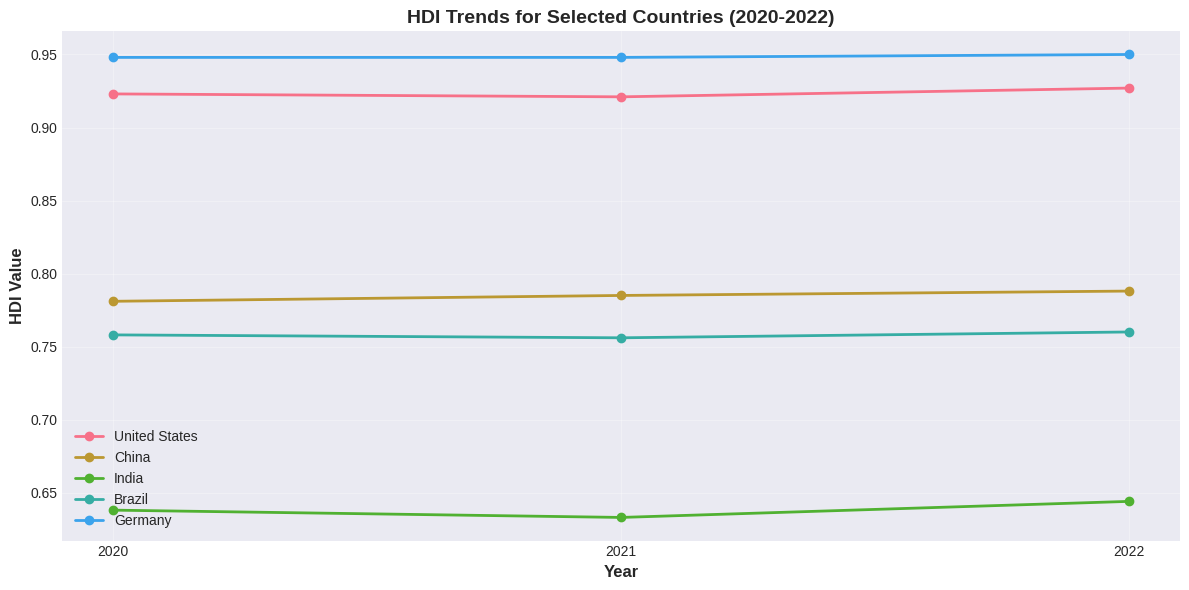

Line chart created and saved as 'hdi_trend_line_chart.png'


In [ ]:
# Task 3A: Line Chart — HDI Trend for 5 Countries
# Select 5 countries from different regions for comparison
selected_countries = ['United States', 'China', 'India', 'Brazil', 'Germany']

# Filter data for selected countries
selected_data = hdi_2020_2022[hdi_2020_2022['country'].isin(selected_countries)].copy()

# Create line chart
plt.figure(figsize=(12, 6))
for country in selected_countries:
    country_data = selected_data[selected_data['country'] == country].sort_values('year')
    if len(country_data) > 0:
        plt.plot(country_data['year'], country_data['hdi'], marker='o', linewidth=2, label=country)

plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('HDI Value', fontsize=12, fontweight='bold')
plt.title('HDI Trends for Selected Countries (2020-2022)', fontsize=14, fontweight='bold')
plt.legend(loc='best', fontsize=10)
plt.grid(True, alpha=0.3)
plt.xticks([2020, 2021, 2022])
plt.tight_layout()
plt.savefig('hdi_trend_line_chart.png', dpi=300, bbox_inches='tight')
plt.show()

print("Line chart created and saved as 'hdi_trend_line_chart.png'")


### B. Generate Visualizations

#### Bar Chart: Average HDI by Region (2020–2022)


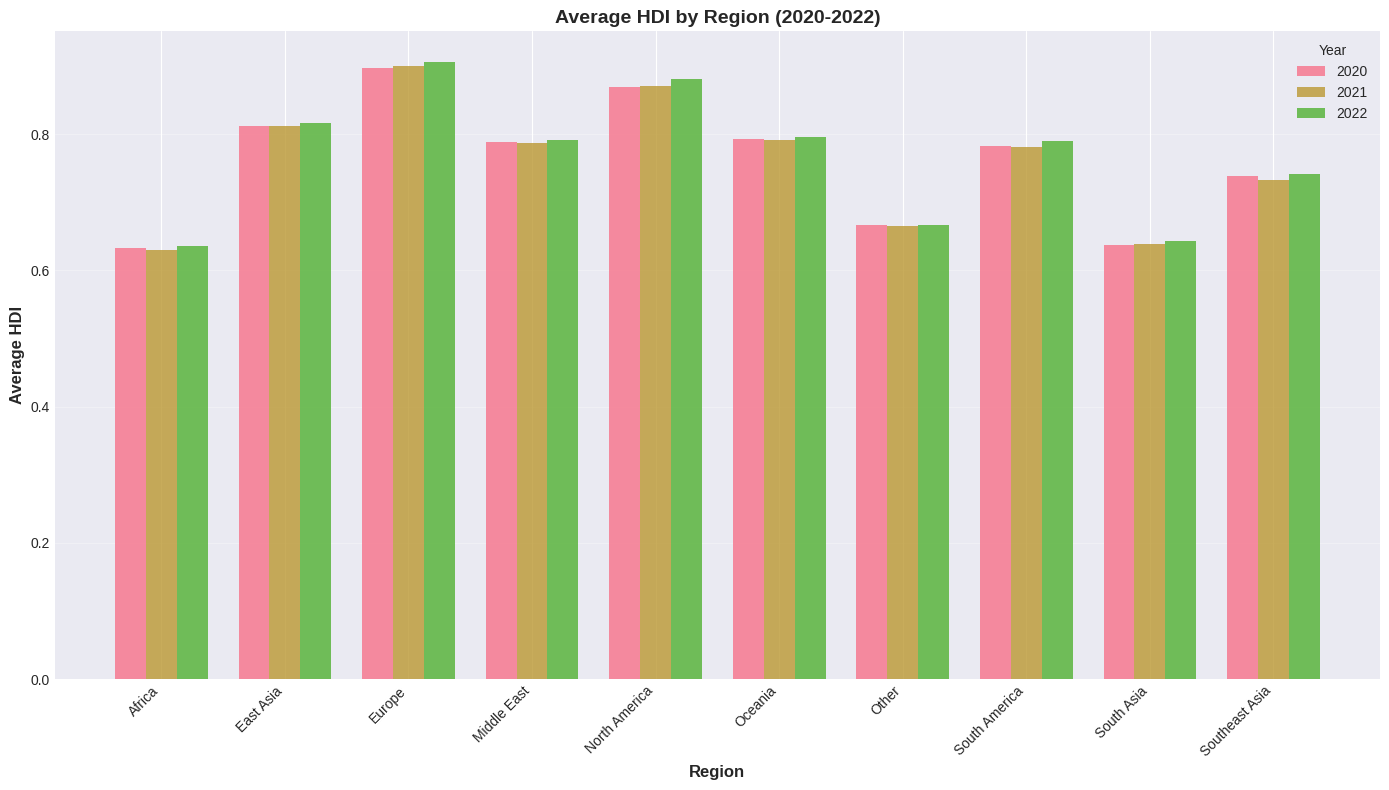

Bar chart created and saved as 'hdi_by_region_bar_chart.png'


In [ ]:
# Task 3B: Bar Chart - Average HDI by Region
# Since the dataset doesn't have a region column, we'll create a region mapping
# based on country names

# Define region mapping (simplified - can be expanded)
def assign_region(country):
    """Assign region based on country name"""
    # South Asia
    south_asia = ['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka']
    # Middle East
    middle_east = ['Bahrain', 'Iran', 'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Oman',
                    'Palestine', 'Qatar', 'Saudi Arabia', 'Syria', 'United Arab Emirates', 'Yemen']
    # Europe
    europe = ['Albania', 'Andorra', 'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic',
              'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland',
              'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Norway', 'Poland',
              'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom']
    # North America
    north_america = ['United States', 'Canada', 'Mexico']
    # South America
    south_america = ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Paraguay', 'Peru', 'Uruguay', 'Venezuela']
    # East Asia
    east_asia = ['China', 'Japan', 'South Korea', 'Mongolia', 'North Korea']
    # Southeast Asia
    southeast_asia = ['Indonesia', 'Malaysia', 'Philippines', 'Singapore', 'Thailand', 'Vietnam', 'Myanmar', 'Cambodia', 'Laos']
    # Africa
    africa = ['Algeria', 'Angola', 'Botswana', 'Egypt', 'Ethiopia', 'Ghana', 'Kenya', 'Morocco', 'Nigeria',
              'South Africa', 'Tanzania', 'Tunisia', 'Uganda', 'Zimbabwe']
    # Oceania
    oceania = ['Australia', 'New Zealand', 'Fiji', 'Papua New Guinea']

    if country in south_asia:
        return 'South Asia'
    elif country in middle_east:
        return 'Middle East'
    elif country in europe:
        return 'Europe'
    elif country in north_america:
        return 'North America'
    elif country in south_america:
        return 'South America'
    elif country in east_asia:
        return 'East Asia'
    elif country in southeast_asia:
        return 'Southeast Asia'
    elif country in africa:
        return 'Africa'
    elif country in oceania:
        return 'Oceania'
    else:
        return 'Other'

# Add region column
hdi_2020_2022['Region'] = hdi_2020_2022['country'].apply(assign_region)

# Group by Region and Year, compute mean HDI
region_hdi = hdi_2020_2022.groupby(['Region', 'year'])['hdi'].mean().reset_index()

# Create bar chart
fig, ax = plt.subplots(figsize=(14, 8))
years = [2020, 2021, 2022]
regions = sorted(region_hdi['Region'].unique())
x = np.arange(len(regions))
width = 0.25

for i, year in enumerate(years):
    year_data = region_hdi[region_hdi['year'] == year]
    values = [year_data[year_data['Region'] == reg]['hdi'].values[0]
              if len(year_data[year_data['Region'] == reg]) > 0 else 0
              for reg in regions]
    ax.bar(x + i*width, values, width, label=f'{year}', alpha=0.8)

ax.set_xlabel('Region', fontsize=12, fontweight='bold')
ax.set_ylabel('Average HDI', fontsize=12, fontweight='bold')
ax.set_title('Average HDI by Region (2020-2022)', fontsize=14, fontweight='bold')
ax.set_xticks(x + width)
ax.set_xticklabels(regions, rotation=45, ha='right')
ax.legend(title='Year', fontsize=10)
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('hdi_by_region_bar_chart.png', dpi=300, bbox_inches='tight')
plt.show()

print("Bar chart created and saved as 'hdi_by_region_bar_chart.png'")


#### Box Plot: HDI Distribution for 2020, 2021, and 2022


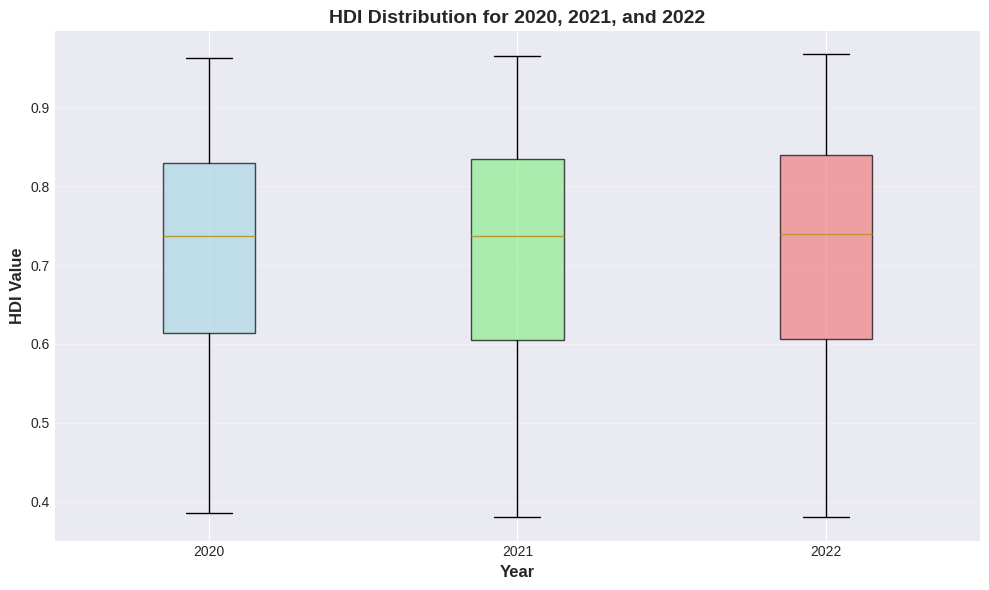

Distribution Analysis:

2020:
  Mean: 0.7209
  Median: 0.7370
  Std: 0.1482
  Min: 0.3860
  Max: 0.9630

2021:
  Mean: 0.7200
  Median: 0.7370
  Std: 0.1501
  Min: 0.3810
  Max: 0.9650

2022:
  Mean: 0.7229
  Median: 0.7395
  Std: 0.1530
  Min: 0.3800
  Max: 0.9670

Box plot created and saved as 'hdi_distribution_boxplot.png'


In [ ]:
# Task 3B: Box Plot - HDI Distribution for 2020, 2021, and 2022
plt.figure(figsize=(10, 6))
box_data = [hdi_2020_2022[hdi_2020_2022['year'] == year]['hdi'].dropna() for year in [2020, 2021, 2022]]
bp = plt.boxplot(box_data, labels=['2020', '2021', '2022'], patch_artist=True)

# Customize box plot
colors = ['lightblue', 'lightgreen', 'lightcoral']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('HDI Value', fontsize=12, fontweight='bold')
plt.title('HDI Distribution for 2020, 2021, and 2022', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('hdi_distribution_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

# Comment on distribution differences
print("Distribution Analysis:")
for year in [2020, 2021, 2022]:
    year_data = hdi_2020_2022[hdi_2020_2022['year'] == year]['hdi'].dropna()
    print(f"\n{year}:")
    print(f"  Mean: {year_data.mean():.4f}")
    print(f"  Median: {year_data.median():.4f}")
    print(f"  Std: {year_data.std():.4f}")
    print(f"  Min: {year_data.min():.4f}")
    print(f"  Max: {year_data.max():.4f}")

print("\nBox plot created and saved as 'hdi_distribution_boxplot.png'")


#### Scatter Plot: HDI vs. GNI per Capita


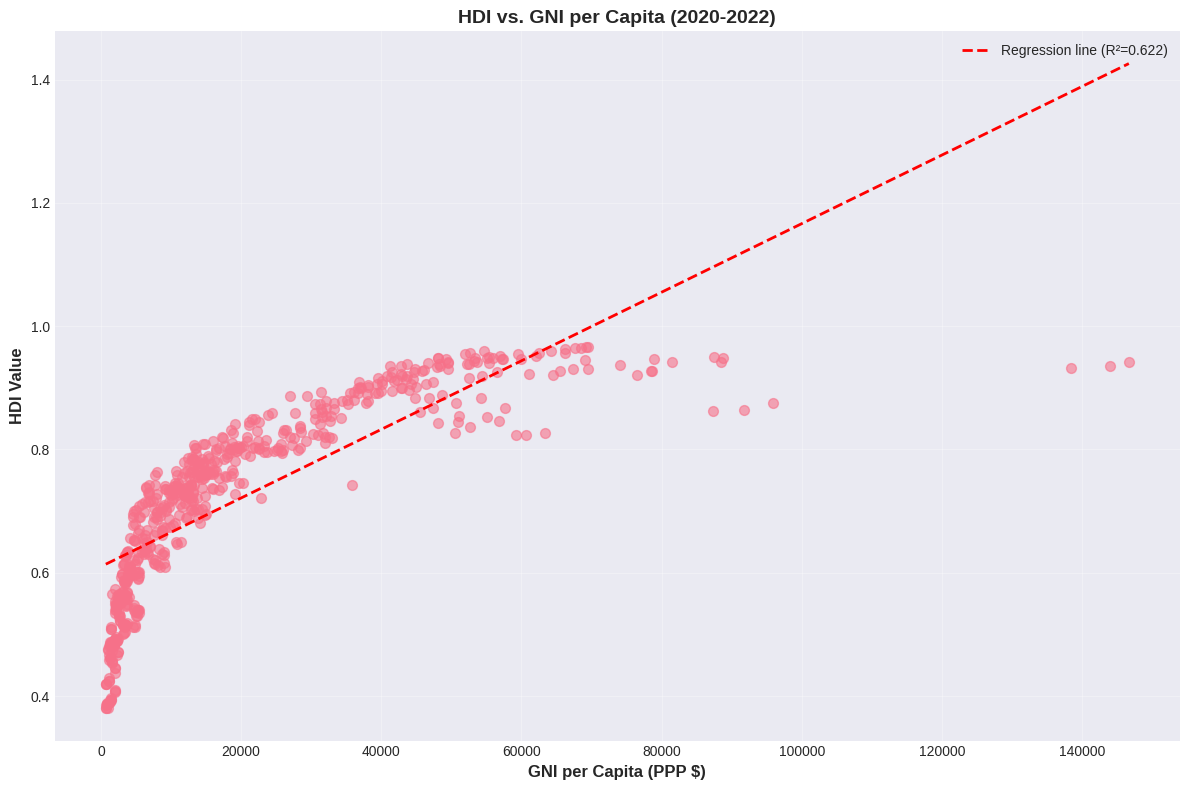

Correlation coefficient: 0.7884
R-squared: 0.6216
Scatter plot created and saved as 'hdi_vs_gni_scatter.png'


In [ ]:
# Task 3B: Scatter Plot - HDI vs. GNI per Capita
# Check if GNI per Capita column exists
if 'gross_inc_percap' in hdi_2020_2022.columns:
    # Filter out missing values
    scatter_data = hdi_2020_2022[['hdi', 'gross_inc_percap']].dropna()

    plt.figure(figsize=(12, 8))
    plt.scatter(scatter_data['gross_inc_percap'], scatter_data['hdi'], alpha=0.6, s=50)

    # Add regression line
    slope, intercept, r_value, p_value, std_err = stats.linregress(
        scatter_data['gross_inc_percap'], scatter_data['hdi']
    )
    line_x = np.linspace(scatter_data['gross_inc_percap'].min(),
                        scatter_data['gross_inc_percap'].max(), 100)
    line_y = slope * line_x + intercept
    plt.plot(line_x, line_y, 'r--', linewidth=2, label=f'Regression line (R²={r_value**2:.3f})')

    plt.xlabel('GNI per Capita (PPP $)', fontsize=12, fontweight='bold')
    plt.ylabel('HDI Value', fontsize=12, fontweight='bold')
    plt.title('HDI vs. GNI per Capita (2020-2022)', fontsize=14, fontweight='bold')
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('hdi_vs_gni_scatter.png', dpi=300, bbox_inches='tight')
    plt.show()

    print(f"Correlation coefficient: {r_value:.4f}")
    print(f"R-squared: {r_value**2:.4f}")
    print("Scatter plot created and saved as 'hdi_vs_gni_scatter.png'")
else:
    print("GNI per Capita variable not available in the dataset.")


## Task 4: Short Analysis Questions


In [ ]:
# Task 4: Short Analysis Questions

# Which countries show the greatest improvement in HDI from 2020 to 2022?
hdi_change = hdi_2020_2022[hdi_2020_2022['year'].isin([2020, 2022])].pivot_table(
    index='country', columns='year', values='hdi'
)
hdi_change['improvement'] = hdi_change[2022] - hdi_change[2020]
hdi_change = hdi_change.dropna(subset=['improvement']).sort_values('improvement', ascending=False)

print("Top 10 countries with greatest HDI improvement (2020-2022):")
display(hdi_change.head(10)[[2020, 2022, 'improvement']])

# Did any countries experience a decline in HDI?
declines = hdi_change[hdi_change['improvement'] < 0].sort_values('improvement')
print(f"\nCountries with HDI decline: {len(declines)}")
if len(declines) > 0:
    print("Top 10 countries with greatest HDI decline:")
    display(declines.head(10)[[2020, 2022, 'improvement']])

# Which region has the highest and lowest average HDI across these three years?
region_avg = hdi_2020_2022.groupby('Region')['hdi'].mean().sort_values(ascending=False)
print("\nAverage HDI by Region (2020-2022):")
print(region_avg)
print(f"\nHighest average HDI: {region_avg.index[0]} ({region_avg.iloc[0]:.4f})")
print(f"Lowest average HDI: {region_avg.index[-1]} ({region_avg.iloc[-1]:.4f})")


Top 10 countries with greatest HDI improvement (2020-2022):


year,2020,2022,improvement
country,,,
Andorra,0.843,0.884,0.041
Azerbaijan,0.722,0.760,0.038
Ecuador,0.734,0.765,0.031
Maldives,0.737,0.762,0.025
Mexico,0.757,0.781,0.024
San Marino,0.844,0.867,0.023
Tajikistan,0.656,0.679,0.023
Bahamas,0.798,0.820,0.022
Kuwait,0.826,0.847,0.021



Countries with HDI decline: 54
Top 10 countries with greatest HDI decline:


year,2020,2022,improvement
country,,,
Timor-Leste,0.633,0.566,-0.067
Ukraine,0.762,0.734,-0.028
Afghanistan,0.488,0.462,-0.026
Namibia,0.634,0.610,-0.024
Lebanon,0.742,0.723,-0.019
Saint Vincent and the Grenadines,0.785,0.772,-0.013
Suriname,0.702,0.690,-0.012
Eswatini (Kingdom of),0.622,0.610,-0.012
Gabon,0.704,0.693,-0.011



Average HDI by Region (2020-2022):
Region
Europe            0.900927
North America     0.873667
East Asia         0.813556
Oceania           0.793167
Middle East       0.788909
South America     0.784417
Southeast Asia    0.737762
Other             0.665910
South Asia        0.639583
Africa            0.632744
Name: hdi, dtype: float64

Highest average HDI: Europe (0.9009)
Lowest average HDI: Africa (0.6327)


---

# Problem 2: Advanced HDI Exploration (South Asia)

## Task 1: Create South Asia Subset


In [ ]:
# Task 1: Create South Asia Subset
south_asia_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
                        "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

# Filter dataset for South Asian countries
hdi_south_asia = df[df['country'].isin(south_asia_countries)].copy()

print(f"South Asia dataset shape: {hdi_south_asia.shape}")
print(f"Countries included: {sorted(hdi_south_asia['country'].unique())}")
print(f"Year range: {hdi_south_asia['year'].min()} to {hdi_south_asia['year'].max()}")

# Save the filtered dataset
hdi_south_asia.to_csv('HDI_SouthAsia.csv', index=False)
print("\nSaved HDI_SouthAsia.csv successfully!")


South Asia dataset shape: (264, 30)
Countries included: ['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka']
Year range: 1990 to 2022

Saved HDI_SouthAsia.csv successfully!


## Task 2: Composite Development Score


In [ ]:
# Task 2: Composite Development Score
# Note: The assignment mentions using "Life Expectancy Index" and "GNI per Capita Index"
# However, the dataset has "life_expectancy" (in years) and "gross_inc_percap" (in dollars)
# We'll use these values directly, but normalize them first to create indices

# Get the latest year data for South Asia (2022)
south_asia_2022 = hdi_south_asia[hdi_south_asia['year'] == 2022].copy()

# Normalize life expectancy (assuming 0-100 scale, typical range is 30-85 years)
# For simplicity, we'll use the raw values scaled appropriately
# Or we can use the values directly if they're already in index form
# Let's check the data first
print("Sample data for Composite Score calculation:")
display(south_asia_2022[['country', 'life_expectancy', 'gross_inc_percap', 'hdi']].head())

# Create normalized indices (0-1 scale)
# Life Expectancy Index: normalize to 0-1 (assuming range 20-85 years)
life_exp_min = south_asia_2022['life_expectancy'].min()
life_exp_max = south_asia_2022['life_expectancy'].max()
south_asia_2022['life_expectancy_index'] = (south_asia_2022['life_expectancy'] - 20) / (85 - 20)
south_asia_2022['life_expectancy_index'] = south_asia_2022['life_expectancy_index'].clip(0, 1)

# GNI per Capita Index: normalize using log scale (typical for HDI)
# Using formula: (ln(GNI) - ln(100)) / (ln(75000) - ln(100))
gni_min = south_asia_2022['gross_inc_percap'].min()
gni_max = south_asia_2022['gross_inc_percap'].max()
south_asia_2022['gni_index'] = (np.log(south_asia_2022['gross_inc_percap']) - np.log(100)) / (np.log(75000) - np.log(100))
south_asia_2022['gni_index'] = south_asia_2022['gni_index'].clip(0, 1)

# Calculate Composite Score = 0.30 × Life Expectancy Index + 0.30 × GNI per Capita Index
south_asia_2022['Composite Score'] = (0.30 * south_asia_2022['life_expectancy_index'] +
                                       0.30 * south_asia_2022['gni_index'])

# Rank countries by Composite Score
south_asia_2022 = south_asia_2022.sort_values('Composite Score', ascending=False)

print("\nSouth Asian countries ranked by Composite Score:")
display(south_asia_2022[['country', 'hdi', 'life_expectancy', 'gross_inc_percap', 'Composite Score']].head(10))


Sample data for Composite Score calculation:


,country,life_expectancy,gross_inc_percap,hdi
32,Afghanistan,62.879,1335.205733,0.462
461,Bangladesh,73.698,6511.122178,0.670
659,Bhutan,72.229,10624.873880,0.681
2573,India,67.744,6950.526798,0.644
3530,Maldives,80.839,18846.792190,0.762



South Asian countries ranked by Composite Score:


,country,hdi,life_expectancy,gross_inc_percap,Composite Score
3530,Maldives,0.762,80.839,18846.792190,0.518206
5477,Sri Lanka,0.780,76.610,11899.498470,0.477849
659,Bhutan,0.681,72.229,10624.873880,0.452495
461,Bangladesh,0.670,73.698,6511.122178,0.437084
2573,India,0.644,67.744,6950.526798,0.412563
4091,Nepal,0.601,70.484,4025.554685,0.400460
4388,Pakistan,0.540,66.431,5374.270423,0.394848
32,Afghanistan,0.462,62.879,1335.205733,0.315349


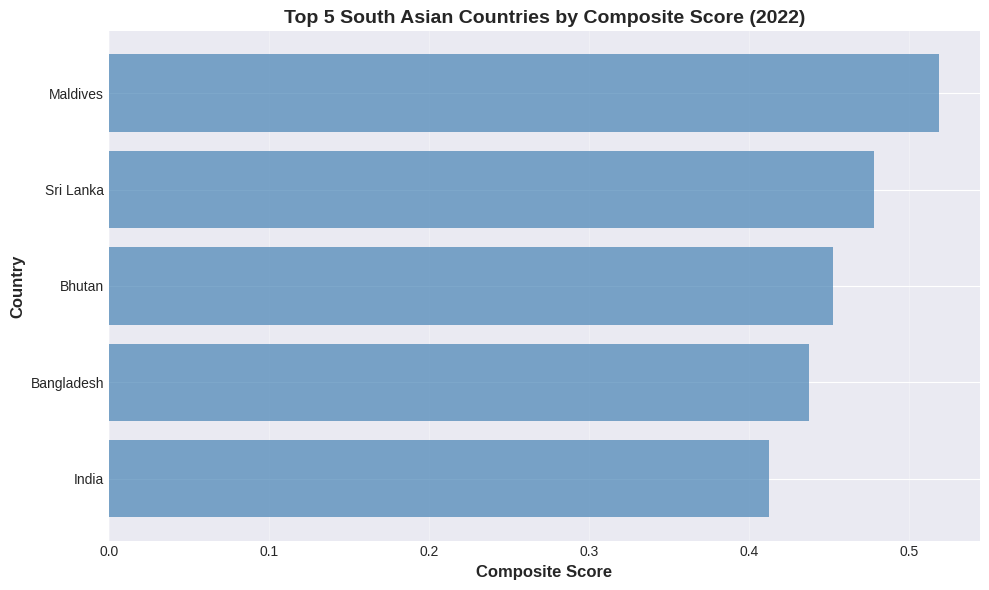


Comparison of Composite Score vs HDI Ranking:


,country,HDI Rank,Composite Rank,hdi,Composite Score
3530,Maldives,2.0,1.0,0.762,0.518206
5477,Sri Lanka,1.0,2.0,0.780,0.477849
659,Bhutan,3.0,3.0,0.681,0.452495
461,Bangladesh,4.0,4.0,0.670,0.437084
2573,India,5.0,5.0,0.644,0.412563
4091,Nepal,6.0,6.0,0.601,0.400460
4388,Pakistan,7.0,7.0,0.540,0.394848
32,Afghanistan,8.0,8.0,0.462,0.315349



Differences in ranking:
          country  Rank Difference
3530     Maldives              1.0
5477    Sri Lanka             -1.0
659        Bhutan              0.0
461    Bangladesh              0.0
2573        India              0.0
4091        Nepal              0.0
4388     Pakistan              0.0
32    Afghanistan              0.0


In [ ]:
# Plot top 5 countries in horizontal bar chart
top_5_composite = south_asia_2022.head(5)

plt.figure(figsize=(10, 6))
plt.barh(top_5_composite['country'], top_5_composite['Composite Score'], color='steelblue', alpha=0.7)
plt.xlabel('Composite Score', fontsize=12, fontweight='bold')
plt.ylabel('Country', fontsize=12, fontweight='bold')
plt.title('Top 5 South Asian Countries by Composite Score (2022)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.savefig('south_asia_composite_score.png', dpi=300, bbox_inches='tight')
plt.show()

# Compare Composite Score ranking with HDI ranking
comparison = south_asia_2022[['country', 'hdi', 'Composite Score']].copy()
comparison['HDI Rank'] = comparison['hdi'].rank(ascending=False)
comparison['Composite Rank'] = comparison['Composite Score'].rank(ascending=False)
comparison = comparison.sort_values('Composite Score', ascending=False)

print("\nComparison of Composite Score vs HDI Ranking:")
display(comparison[['country', 'HDI Rank', 'Composite Rank', 'hdi', 'Composite Score']])

print("\nDifferences in ranking:")
comparison['Rank Difference'] = comparison['HDI Rank'] - comparison['Composite Rank']
print(comparison[['country', 'Rank Difference']])


## Task 3: Outlier Detection


In [ ]:
# Task 3: Outlier Detection using 1.5 × IQR rule
# Use latest year data (2022) for South Asia
outlier_data = south_asia_2022[['country', 'hdi', 'gross_inc_percap']].dropna().copy()

def detect_outliers_iqr(data, column):
    """Detect outliers using 1.5 × IQR rule"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Detect outliers in HDI
hdi_outliers, hdi_lower, hdi_upper = detect_outliers_iqr(outlier_data, 'hdi')
print("HDI Outliers (1.5 × IQR rule):")
print(f"Lower bound: {hdi_lower:.4f}, Upper bound: {hdi_upper:.4f}")
if len(hdi_outliers) > 0:
    display(hdi_outliers[['country', 'hdi']])
else:
    print("No outliers detected in HDI")

# Detect outliers in GNI per Capita
gni_outliers, gni_lower, gni_upper = detect_outliers_iqr(outlier_data, 'gross_inc_percap')
print("\nGNI per Capita Outliers (1.5 × IQR rule):")
print(f"Lower bound: ${gni_lower:.2f}, Upper bound: ${gni_upper:.2f}")
if len(gni_outliers) > 0:
    display(gni_outliers[['country', 'gross_inc_percap']])
else:
    print("No outliers detected in GNI per Capita")

# Mark outliers in the dataset
outlier_data['is_outlier'] = False
if len(hdi_outliers) > 0:
    outlier_data.loc[hdi_outliers.index, 'is_outlier'] = True
if len(gni_outliers) > 0:
    outlier_data.loc[gni_outliers.index, 'is_outlier'] = True


HDI Outliers (1.5 × IQR rule):
Lower bound: 0.4125, Upper bound: 0.8745
No outliers detected in HDI

GNI per Capita Outliers (1.5 × IQR rule):
Lower bound: $-3822.57, Upper bound: $19803.19
No outliers detected in GNI per Capita


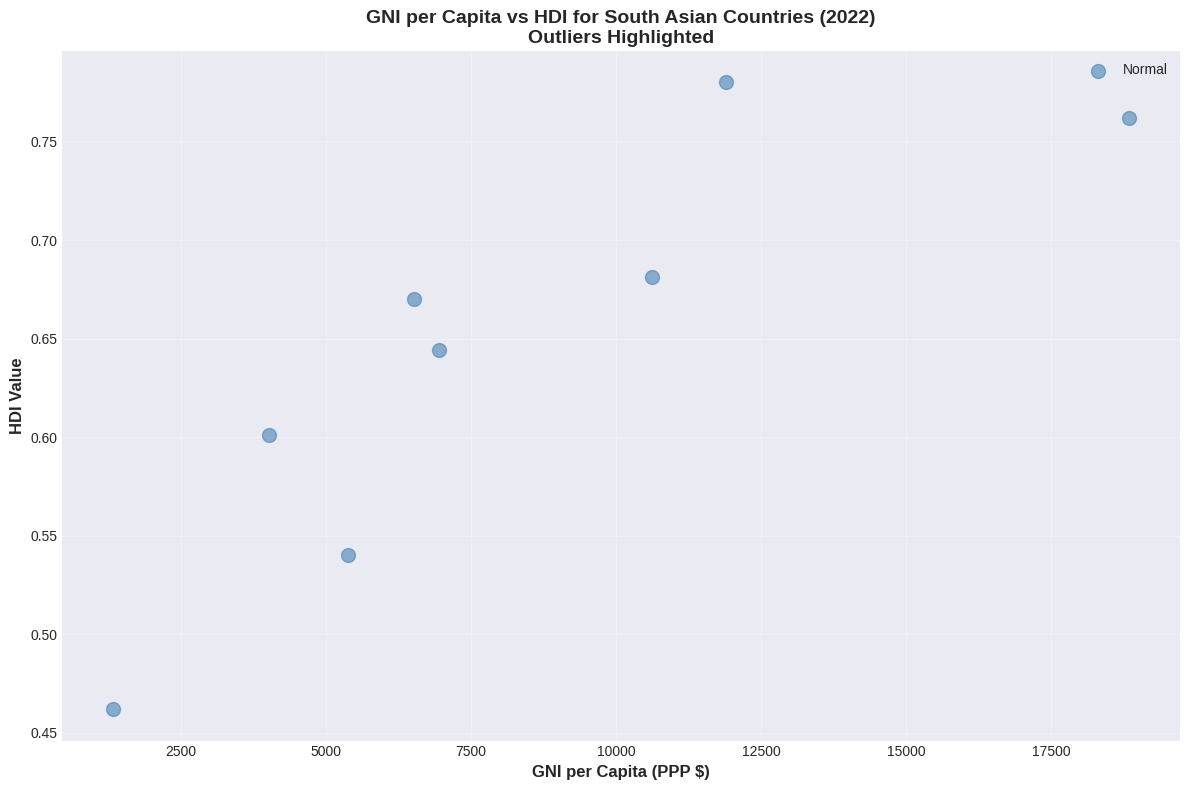

In [ ]:
# Create scatter plot with outliers highlighted
plt.figure(figsize=(12, 8))

# Separate outliers and normal points
normal_points = outlier_data[~outlier_data['is_outlier']]
outlier_points = outlier_data[outlier_data['is_outlier']]

# Plot normal points
plt.scatter(normal_points['gross_inc_percap'], normal_points['hdi'],
           alpha=0.6, s=100, color='steelblue', label='Normal')

# Plot outliers
if len(outlier_points) > 0:
    plt.scatter(outlier_points['gross_inc_percap'], outlier_points['hdi'],
               alpha=0.8, s=150, color='red', marker='x', linewidths=2, label='Outliers')
    # Add country labels for outliers
    for idx, row in outlier_points.iterrows():
        plt.annotate(row['country'], (row['gross_inc_percap'], row['hdi']),
                    xytext=(5, 5), textcoords='offset points', fontsize=9)

plt.xlabel('GNI per Capita (PPP $)', fontsize=12, fontweight='bold')
plt.ylabel('HDI Value', fontsize=12, fontweight='bold')
plt.title('GNI per Capita vs HDI for South Asian Countries (2022)\nOutliers Highlighted',
          fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('south_asia_outliers_scatter.png', dpi=300, bbox_inches='tight')
plt.show()

# Discuss why identified countries stand out as outliers
if len(outlier_points) > 0:
    print("\nDiscussion of Outliers:")
    for idx, row in outlier_points.iterrows():
        print(f"\n{row['country']}:")
        print(f"  HDI: {row['hdi']:.4f}")
        print(f"  GNI per Capita: ${row['gross_inc_percap']:.2f}")
        print(f"  These values deviate significantly from the regional pattern.")


## Task 4: Exploring Metric Relationships


In [ ]:
# Task 4: Exploring Metric Relationships
# Select two HDI components: Gender Development Index and Life Expectancy
# Use latest year data (2022)
relationship_data = south_asia_2022[['country', 'hdi', 'gender_development', 'life_expectancy']].dropna().copy()

# Compute Pearson correlation
corr_gender = relationship_data['hdi'].corr(relationship_data['gender_development'])
corr_life = relationship_data['hdi'].corr(relationship_data['life_expectancy'])

print("Pearson Correlation with HDI:")
print(f"Gender Development Index: {corr_gender:.4f}")
print(f"Life Expectancy: {corr_life:.4f}")

# Determine which is most strongly and weakly related
correlations = {'Gender Development Index': corr_gender, 'Life Expectancy': corr_life}
strongest = max(correlations, key=correlations.get)
weakest = min(correlations, key=correlations.get)

print(f"\nStrongest relationship with HDI: {strongest} (r={correlations[strongest]:.4f})")
print(f"Weakest relationship with HDI: {weakest} (r={correlations[weakest]:.4f})")


Pearson Correlation with HDI:
Gender Development Index: 0.8848
Life Expectancy: 0.9282

Strongest relationship with HDI: Life Expectancy (r=0.9282)
Weakest relationship with HDI: Gender Development Index (r=0.8848)


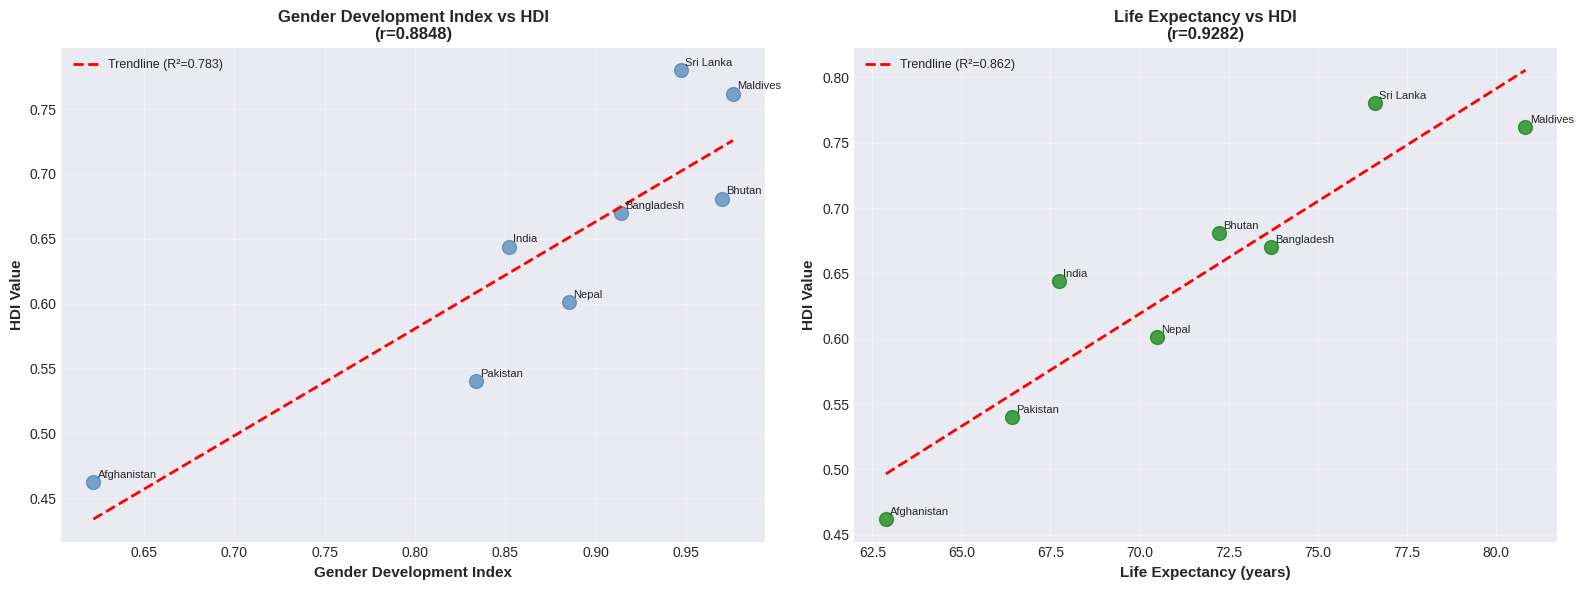


Scatter plots created and saved as 'south_asia_metric_relationships.png'


In [ ]:
# Create scatter plots with trendlines
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot 1: Gender Development Index vs HDI
axes[0].scatter(relationship_data['gender_development'], relationship_data['hdi'],
               alpha=0.7, s=100, color='steelblue')
# Add trendline
slope1, intercept1, r1, p1, std_err1 = stats.linregress(
    relationship_data['gender_development'], relationship_data['hdi']
)
x1 = np.linspace(relationship_data['gender_development'].min(),
                relationship_data['gender_development'].max(), 100)
y1 = slope1 * x1 + intercept1
axes[0].plot(x1, y1, 'r--', linewidth=2, label=f'Trendline (R²={r1**2:.3f})')
axes[0].set_xlabel('Gender Development Index', fontsize=11, fontweight='bold')
axes[0].set_ylabel('HDI Value', fontsize=11, fontweight='bold')
axes[0].set_title(f'Gender Development Index vs HDI\n(r={r1:.4f})', fontsize=12, fontweight='bold')
axes[0].legend(fontsize=9)
axes[0].grid(True, alpha=0.3)
# Add country labels
for idx, row in relationship_data.iterrows():
    axes[0].annotate(row['country'], (row['gender_development'], row['hdi']),
                    xytext=(3, 3), textcoords='offset points', fontsize=8)

# Scatter plot 2: Life Expectancy vs HDI
axes[1].scatter(relationship_data['life_expectancy'], relationship_data['hdi'],
               alpha=0.7, s=100, color='green')
# Add trendline
slope2, intercept2, r2, p2, std_err2 = stats.linregress(
    relationship_data['life_expectancy'], relationship_data['hdi']
)
x2 = np.linspace(relationship_data['life_expectancy'].min(),
                relationship_data['life_expectancy'].max(), 100)
y2 = slope2 * x2 + intercept2
axes[1].plot(x2, y2, 'r--', linewidth=2, label=f'Trendline (R²={r2**2:.3f})')
axes[1].set_xlabel('Life Expectancy (years)', fontsize=11, fontweight='bold')
axes[1].set_ylabel('HDI Value', fontsize=11, fontweight='bold')
axes[1].set_title(f'Life Expectancy vs HDI\n(r={r2:.4f})', fontsize=12, fontweight='bold')
axes[1].legend(fontsize=9)
axes[1].grid(True, alpha=0.3)
# Add country labels
for idx, row in relationship_data.iterrows():
    axes[1].annotate(row['country'], (row['life_expectancy'], row['hdi']),
                    xytext=(3, 3), textcoords='offset points', fontsize=8)

plt.tight_layout()
plt.savefig('south_asia_metric_relationships.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nScatter plots created and saved as 'south_asia_metric_relationships.png'")


## Task 5: Gap Analysis


In [ ]:
# Task 5: Gap Analysis
# Create GNI HDI Gap = gross_inc_percap - hdi
# Note: This is a simplified gap metric. In reality, GNI is in dollars and HDI is 0-1 scale
# We'll normalize GNI to 0-1 scale first for meaningful comparison

# Use latest year data (2022)
gap_data = south_asia_2022[['country', 'hdi', 'gross_inc_percap']].dropna().copy()

# Normalize GNI to 0-1 scale (using same method as before)
gap_data['gni_normalized'] = (np.log(gap_data['gross_inc_percap']) - np.log(100)) / (np.log(75000) - np.log(100))
gap_data['gni_normalized'] = gap_data['gni_normalized'].clip(0, 1)

# Calculate GNI HDI Gap (normalized GNI - HDI)
gap_data['GNI HDI Gap'] = gap_data['gni_normalized'] - gap_data['hdi']

# Rank by gap in descending order (positive gaps: GNI higher than HDI)
gap_desc = gap_data.sort_values('GNI HDI Gap', ascending=False)
print("Top countries by GNI HDI Gap (Descending - Positive Gaps):")
display(gap_desc[['country', 'hdi', 'gross_inc_percap', 'gni_normalized', 'GNI HDI Gap']].head(10))

# Rank by gap in ascending order (negative gaps: HDI higher than GNI)
gap_asc = gap_data.sort_values('GNI HDI Gap', ascending=True)
print("\nTop countries by GNI HDI Gap (Ascending - Negative Gaps):")
display(gap_asc[['country', 'hdi', 'gross_inc_percap', 'gni_normalized', 'GNI HDI Gap']].head(10))


Top countries by GNI HDI Gap (Descending - Positive Gaps):


,country,hdi,gross_inc_percap,gni_normalized,GNI HDI Gap
4388,Pakistan,0.540,5374.270423,0.601837,0.061837
3530,Maldives,0.762,18846.792190,0.791370,0.029370
659,Bhutan,0.681,10624.873880,0.704793,0.023793
2573,India,0.644,6950.526798,0.640688,-0.003312
461,Bangladesh,0.670,6511.122178,0.630823,-0.039177
4091,Nepal,0.601,4025.554685,0.558188,-0.042812
5477,Sri Lanka,0.780,11899.498470,0.721908,-0.058092
32,Afghanistan,0.462,1335.205733,0.391487,-0.070513



Top countries by GNI HDI Gap (Ascending - Negative Gaps):


,country,hdi,gross_inc_percap,gni_normalized,GNI HDI Gap
32,Afghanistan,0.462,1335.205733,0.391487,-0.070513
5477,Sri Lanka,0.780,11899.498470,0.721908,-0.058092
4091,Nepal,0.601,4025.554685,0.558188,-0.042812
461,Bangladesh,0.670,6511.122178,0.630823,-0.039177
2573,India,0.644,6950.526798,0.640688,-0.003312
659,Bhutan,0.681,10624.873880,0.704793,0.023793
3530,Maldives,0.762,18846.792190,0.791370,0.029370
4388,Pakistan,0.540,5374.270423,0.601837,0.061837


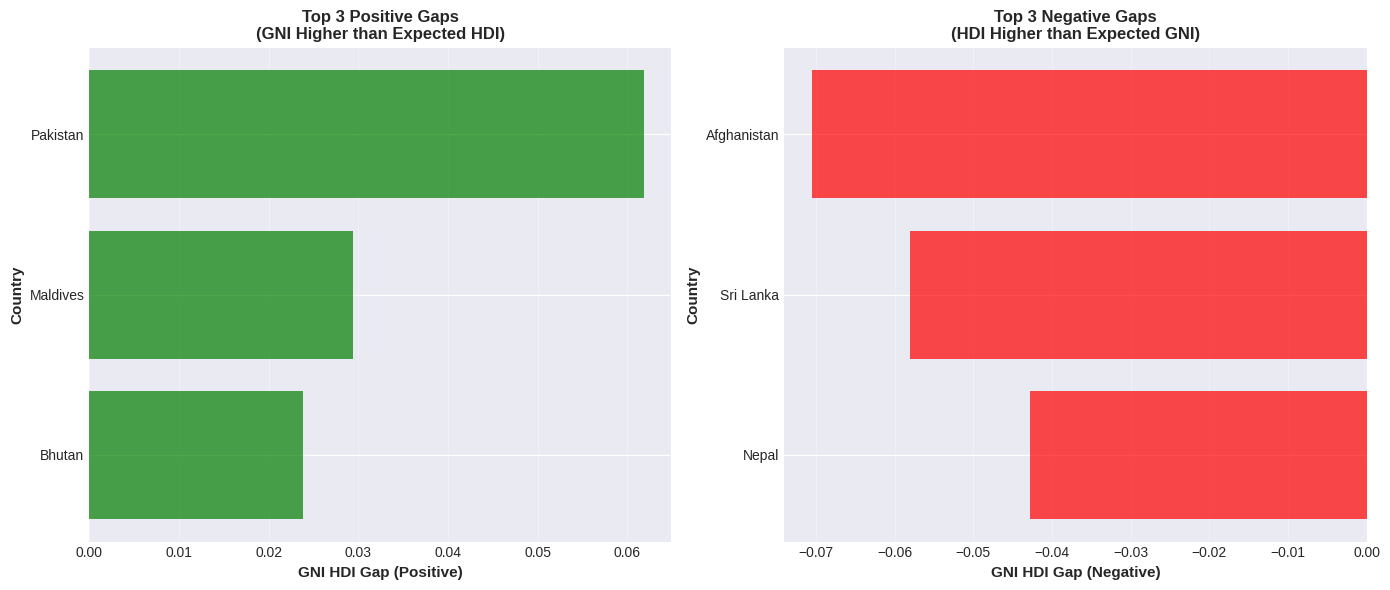


Gap analysis plots created and saved as 'south_asia_gap_analysis.png'

Discussion:
Positive gaps indicate countries where GNI is high but HDI is lower than expected.
This suggests that high income doesn't necessarily translate to high human development.
Negative gaps indicate countries where HDI is higher than expected given their GNI.
This suggests effective use of resources for human development.


In [ ]:
# Plot top 3 positive gaps and top 3 negative gaps
top_3_positive = gap_desc.head(3)
top_3_negative = gap_asc.head(3)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot positive gaps
axes[0].barh(top_3_positive['country'], top_3_positive['GNI HDI Gap'],
            color='green', alpha=0.7)
axes[0].set_xlabel('GNI HDI Gap (Positive)', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Country', fontsize=11, fontweight='bold')
axes[0].set_title('Top 3 Positive Gaps\n(GNI Higher than Expected HDI)',
                 fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='x')
axes[0].invert_yaxis()

# Plot negative gaps
axes[1].barh(top_3_negative['country'], top_3_negative['GNI HDI Gap'],
            color='red', alpha=0.7)
axes[1].set_xlabel('GNI HDI Gap (Negative)', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Country', fontsize=11, fontweight='bold')
axes[1].set_title('Top 3 Negative Gaps\n(HDI Higher than Expected GNI)',
                 fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='x')
axes[1].invert_yaxis()

plt.tight_layout()
plt.savefig('south_asia_gap_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nGap analysis plots created and saved as 'south_asia_gap_analysis.png'")
print("\nDiscussion:")
print("Positive gaps indicate countries where GNI is high but HDI is lower than expected.")
print("This suggests that high income doesn't necessarily translate to high human development.")
print("Negative gaps indicate countries where HDI is higher than expected given their GNI.")
print("This suggests effective use of resources for human development.")


---

# Problem 3: Comparative Regional Analysis: South Asia vs Middle East

## Task 1: Create Middle East Subset


In [ ]:
# Task 1: Create Middle East Subset
# Use the dataset from Problem 1B (2020-2022)
middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait",
                         "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia",
                         "Syria", "United Arab Emirates", "Yemen"]

# Filter Problem 1B dataset for South Asia and Middle East
hdi_south_asia_2020_2022 = hdi_2020_2022[hdi_2020_2022['country'].isin(south_asia_countries)].copy()
hdi_middle_east_2020_2022 = hdi_2020_2022[hdi_2020_2022['country'].isin(middle_east_countries)].copy()

print(f"South Asia subset (2020-2022) shape: {hdi_south_asia_2020_2022.shape}")
print(f"Countries: {sorted(hdi_south_asia_2020_2022['country'].unique())}")

print(f"\nMiddle East subset (2020-2022) shape: {hdi_middle_east_2020_2022.shape}")
print(f"Countries: {sorted(hdi_middle_east_2020_2022['country'].unique())}")

# Save the subsets
hdi_south_asia_2020_2022.to_csv('HDI_SouthAsia_2020_2022.csv', index=False)
hdi_middle_east_2020_2022.to_csv('HDI_MiddleEast_2020_2022.csv', index=False)

print("\nSaved HDI_SouthAsia_2020_2022.csv and HDI_MiddleEast_2020_2022.csv successfully!")


South Asia subset (2020-2022) shape: (24, 31)
Countries: ['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka']

Middle East subset (2020-2022) shape: (33, 31)
Countries: ['Bahrain', 'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Oman', 'Qatar', 'Saudi Arabia', 'United Arab Emirates', 'Yemen']

Saved HDI_SouthAsia_2020_2022.csv and HDI_MiddleEast_2020_2022.csv successfully!


## Task 2: Descriptive Statistics


In [ ]:
# Task 2: Descriptive Statistics
# Compute mean and standard deviation of HDI for each region
south_asia_stats = hdi_south_asia_2020_2022['hdi'].describe()
middle_east_stats = hdi_middle_east_2020_2022['hdi'].describe()

print("Descriptive Statistics for HDI (2020-2022):")
print("\nSouth Asia:")
print(f"  Mean: {south_asia_stats['mean']:.4f}")
print(f"  Std: {south_asia_stats['std']:.4f}")
print(f"  Min: {south_asia_stats['min']:.4f}")
print(f"  Max: {south_asia_stats['max']:.4f}")

print("\nMiddle East:")
print(f"  Mean: {middle_east_stats['mean']:.4f}")
print(f"  Std: {middle_east_stats['std']:.4f}")
print(f"  Min: {middle_east_stats['min']:.4f}")
print(f"  Max: {middle_east_stats['max']:.4f}")

# Identify which region performs better
if south_asia_stats['mean'] > middle_east_stats['mean']:
    print(f"\nSouth Asia performs better on average (Mean HDI: {south_asia_stats['mean']:.4f})")
else:
    print(f"\nMiddle East performs better on average (Mean HDI: {middle_east_stats['mean']:.4f})")


Descriptive Statistics for HDI (2020-2022):

South Asia:
  Mean: 0.6396
  Std: 0.0983
  Min: 0.4620
  Max: 0.7830

Middle East:
  Mean: 0.7889
  Std: 0.1413
  Min: 0.4240
  Max: 0.9370

Middle East performs better on average (Mean HDI: 0.7889)


## Task 3: Top and Bottom Performers


In [ ]:
# Task 3: Top and Bottom Performers
# Calculate average HDI for each country across 2020-2022
south_asia_avg = hdi_south_asia_2020_2022.groupby('country')['hdi'].mean().sort_values(ascending=False)
middle_east_avg = hdi_middle_east_2020_2022.groupby('country')['hdi'].mean().sort_values(ascending=False)

# Top 3 and bottom 3 for each region
sa_top3 = south_asia_avg.head(3)
sa_bottom3 = south_asia_avg.tail(3)
me_top3 = middle_east_avg.head(3)
me_bottom3 = middle_east_avg.tail(3)

print("Top 3 performers in South Asia:")
print(sa_top3)
print("\nBottom 3 performers in South Asia:")
print(sa_bottom3)
print("\nTop 3 performers in Middle East:")
print(me_top3)
print("\nBottom 3 performers in Middle East:")
print(me_bottom3)


Top 3 performers in South Asia:
country
Sri Lanka    0.780000
Maldives     0.750667
Bhutan       0.677667
Name: hdi, dtype: float64

Bottom 3 performers in South Asia:
country
Nepal          0.595000
Pakistan       0.537667
Afghanistan    0.474333
Name: hdi, dtype: float64

Top 3 performers in Middle East:
country
United Arab Emirates    0.932667
Israel                  0.910667
Bahrain                 0.885333
Name: hdi, dtype: float64

Bottom 3 performers in Middle East:
country
Lebanon    0.730000
Iraq       0.667000
Yemen      0.426333
Name: hdi, dtype: float64


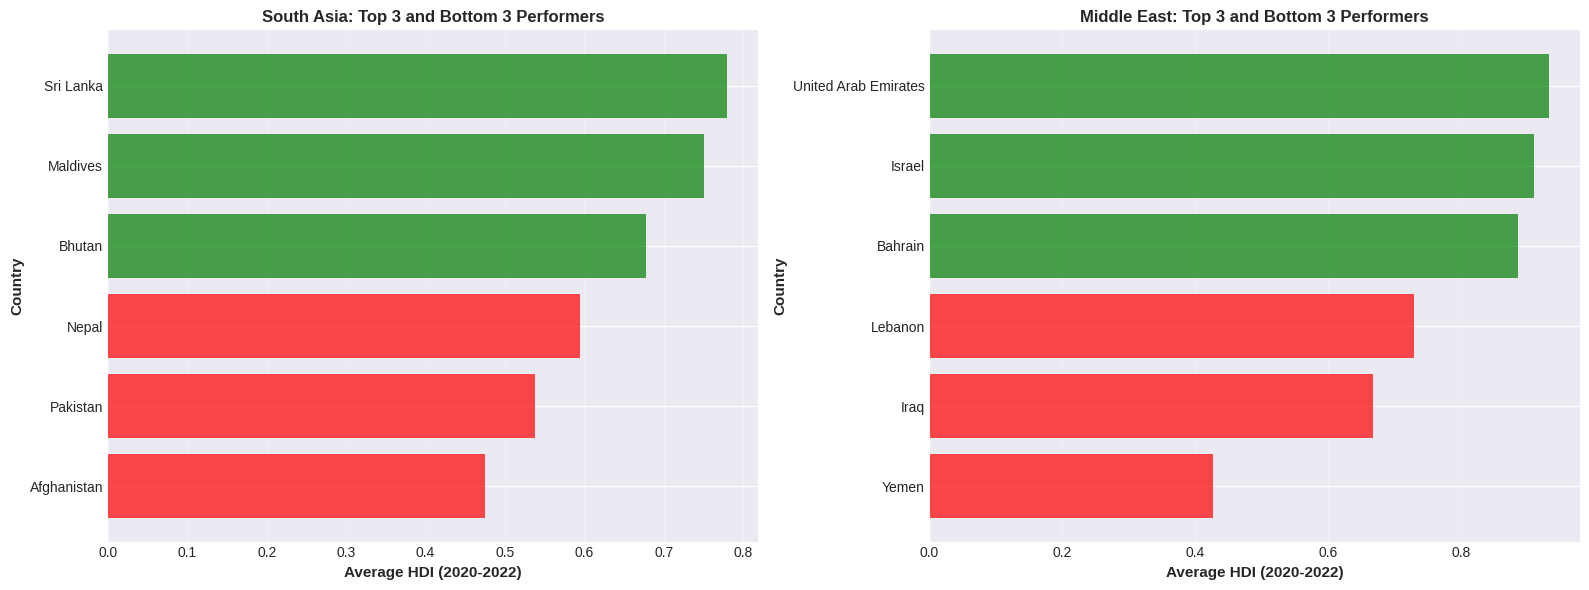

Bar chart created and saved as 'regional_top_bottom_performers.png'


In [ ]:
# Create bar chart comparing top and bottom performers
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# South Asia
sa_data = pd.concat([sa_top3, sa_bottom3])
colors_sa = ['green']*3 + ['red']*3
axes[0].barh(sa_data.index, sa_data.values, color=colors_sa, alpha=0.7)
axes[0].set_xlabel('Average HDI (2020-2022)', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Country', fontsize=11, fontweight='bold')
axes[0].set_title('South Asia: Top 3 and Bottom 3 Performers', fontsize=12, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(True, alpha=0.3, axis='x')

# Middle East
me_data = pd.concat([me_top3, me_bottom3])
colors_me = ['green']*3 + ['red']*3
axes[1].barh(me_data.index, me_data.values, color=colors_me, alpha=0.7)
axes[1].set_xlabel('Average HDI (2020-2022)', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Country', fontsize=11, fontweight='bold')
axes[1].set_title('Middle East: Top 3 and Bottom 3 Performers', fontsize=12, fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('regional_top_bottom_performers.png', dpi=300, bbox_inches='tight')
plt.show()

print("Bar chart created and saved as 'regional_top_bottom_performers.png'")


## Task 4: Metric Comparisons


In [ ]:
# Task 4: Metric Comparisons
# Compare Gender Development Index, Life Expectancy, and GNI per Capita across regions

# Calculate average for each metric by region
metrics = ['gender_development', 'life_expectancy', 'gross_inc_percap']
metric_names = ['Gender Development Index', 'Life Expectancy', 'GNI per Capita']

comparison_data = []
for metric in metrics:
    sa_mean = hdi_south_asia_2020_2022[metric].mean()
    me_mean = hdi_middle_east_2020_2022[metric].mean()
    comparison_data.append({
        'Metric': metric,
        'South Asia': sa_mean,
        'Middle East': me_mean,
        'Difference': me_mean - sa_mean
    })

comparison_df = pd.DataFrame(comparison_data)
comparison_df['Metric'] = metric_names
print("Metric Comparisons (Average 2020-2022):")
display(comparison_df)

# Identify which metric shows greatest disparity
comparison_df['Abs Difference'] = comparison_df['Difference'].abs()
greatest_disparity = comparison_df.loc[comparison_df['Abs Difference'].idxmax()]
print(f"\nGreatest disparity: {greatest_disparity['Metric']}")
print(f"  South Asia: {greatest_disparity['South Asia']:.4f}")
print(f"  Middle East: {greatest_disparity['Middle East']:.4f}")
print(f"  Difference: {greatest_disparity['Difference']:.4f}")


Metric Comparisons (Average 2020-2022):


,Metric,South Asia,Middle East,Difference
0,Gender Development Index,0.881458,0.896545,0.015087
1,Life Expectancy,70.970083,75.855455,4.885371
2,GNI per Capita,7766.509931,37750.770520,29984.260588



Greatest disparity: GNI per Capita
  South Asia: 7766.5099
  Middle East: 37750.7705
  Difference: 29984.2606


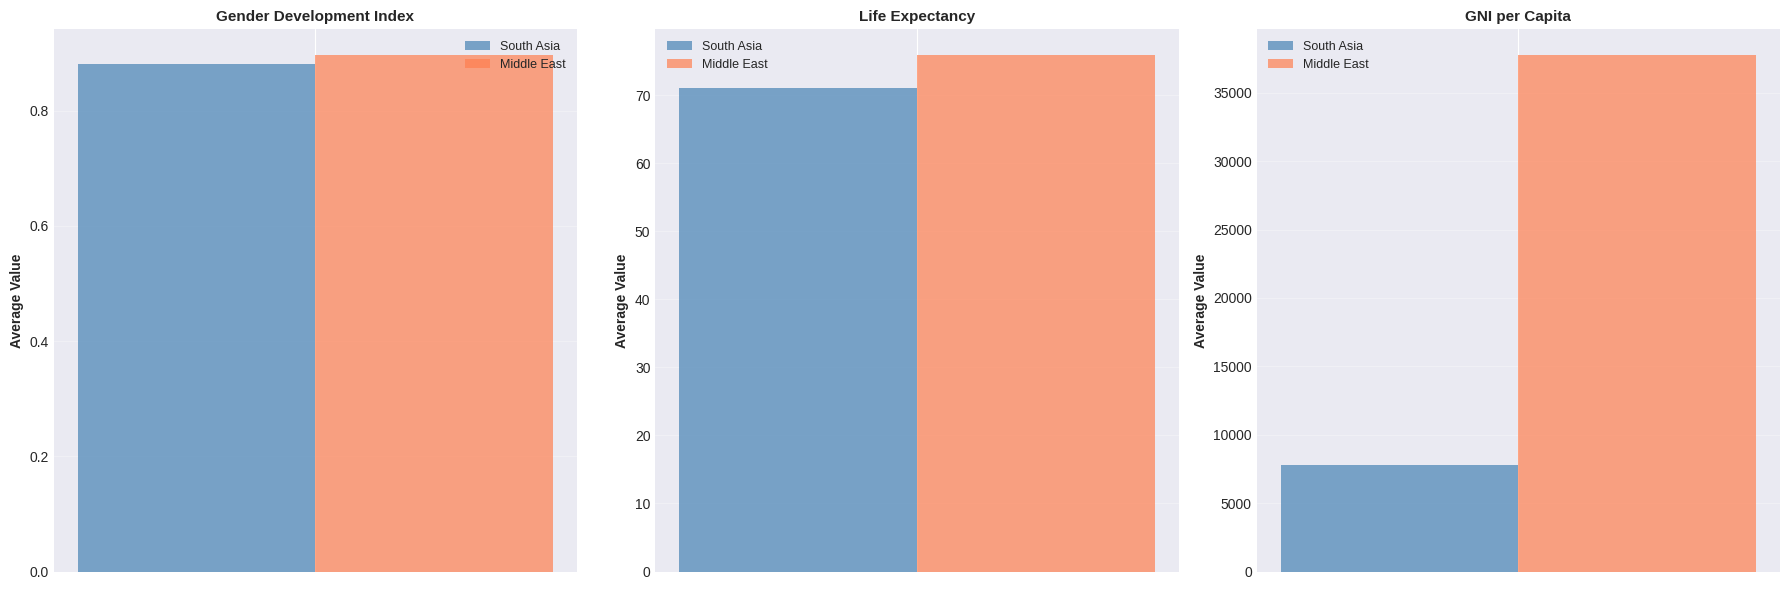

Grouped bar charts created and saved as 'regional_metric_comparisons.png'


In [ ]:
# Create grouped bar charts for metric comparisons
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

x = np.arange(len(metric_names))
width = 0.35

for i, metric in enumerate(metrics):
    sa_values = [hdi_south_asia_2020_2022[metric].mean()]
    me_values = [hdi_middle_east_2020_2022[metric].mean()]

    axes[i].bar(0 - width/2, sa_values[0], width, label='South Asia', alpha=0.7, color='steelblue')
    axes[i].bar(0 + width/2, me_values[0], width, label='Middle East', alpha=0.7, color='coral')

    axes[i].set_ylabel('Average Value', fontsize=10, fontweight='bold')
    axes[i].set_title(metric_names[i], fontsize=11, fontweight='bold')
    axes[i].set_xticks([0])
    axes[i].set_xticklabels([''])
    axes[i].legend(fontsize=9)
    axes[i].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('regional_metric_comparisons.png', dpi=300, bbox_inches='tight')
plt.show()

print("Grouped bar charts created and saved as 'regional_metric_comparisons.png'")


## Task 5: HDI Disparity


In [ ]:
# Task 5: HDI Disparity
# Compute range (max - min) and coefficient of variation (CV = std/mean) for HDI

sa_range = hdi_south_asia_2020_2022['hdi'].max() - hdi_south_asia_2020_2022['hdi'].min()
sa_mean = hdi_south_asia_2020_2022['hdi'].mean()
sa_std = hdi_south_asia_2020_2022['hdi'].std()
sa_cv = sa_std / sa_mean if sa_mean != 0 else 0

me_range = hdi_middle_east_2020_2022['hdi'].max() - hdi_middle_east_2020_2022['hdi'].min()
me_mean = hdi_middle_east_2020_2022['hdi'].mean()
me_std = hdi_middle_east_2020_2022['hdi'].std()
me_cv = me_std / me_mean if me_mean != 0 else 0

print("HDI Disparity Analysis (2020-2022):")
print("\nSouth Asia:")
print(f"  Range (max - min): {sa_range:.4f}")
print(f"  Coefficient of Variation (CV): {sa_cv:.4f}")

print("\nMiddle East:")
print(f"  Range (max - min): {me_range:.4f}")
print(f"  Coefficient of Variation (CV): {me_cv:.4f}")

# Identify which region exhibits more variation
if sa_cv > me_cv:
    print(f"\nSouth Asia exhibits more variation in HDI (CV: {sa_cv:.4f})")
else:
    print(f"\nMiddle East exhibits more variation in HDI (CV: {me_cv:.4f})")


HDI Disparity Analysis (2020-2022):

South Asia:
  Range (max - min): 0.3210
  Coefficient of Variation (CV): 0.1537

Middle East:
  Range (max - min): 0.5130
  Coefficient of Variation (CV): 0.1791

Middle East exhibits more variation in HDI (CV: 0.1791)


## Task 6: Correlation Analysis


In [ ]:
# Task 6: Correlation Analysis
# For each region, compute correlations of HDI with Gender Development Index and Life Expectancy

# South Asia correlations
sa_corr_gender = hdi_south_asia_2020_2022['hdi'].corr(hdi_south_asia_2020_2022['gender_development'])
sa_corr_life = hdi_south_asia_2020_2022['hdi'].corr(hdi_south_asia_2020_2022['life_expectancy'])

# Middle East correlations
me_corr_gender = hdi_middle_east_2020_2022['hdi'].corr(hdi_middle_east_2020_2022['gender_development'])
me_corr_life = hdi_middle_east_2020_2022['hdi'].corr(hdi_middle_east_2020_2022['life_expectancy'])

print("Correlation Analysis:")
print("\nSouth Asia:")
print(f"  HDI vs Gender Development Index: {sa_corr_gender:.4f}")
print(f"  HDI vs Life Expectancy: {sa_corr_life:.4f}")

print("\nMiddle East:")
print(f"  HDI vs Gender Development Index: {me_corr_gender:.4f}")
print(f"  HDI vs Life Expectancy: {me_corr_life:.4f}")


Correlation Analysis:

South Asia:
  HDI vs Gender Development Index: 0.8742
  HDI vs Life Expectancy: 0.9388

Middle East:
  HDI vs Gender Development Index: 0.9357
  HDI vs Life Expectancy: 0.9331


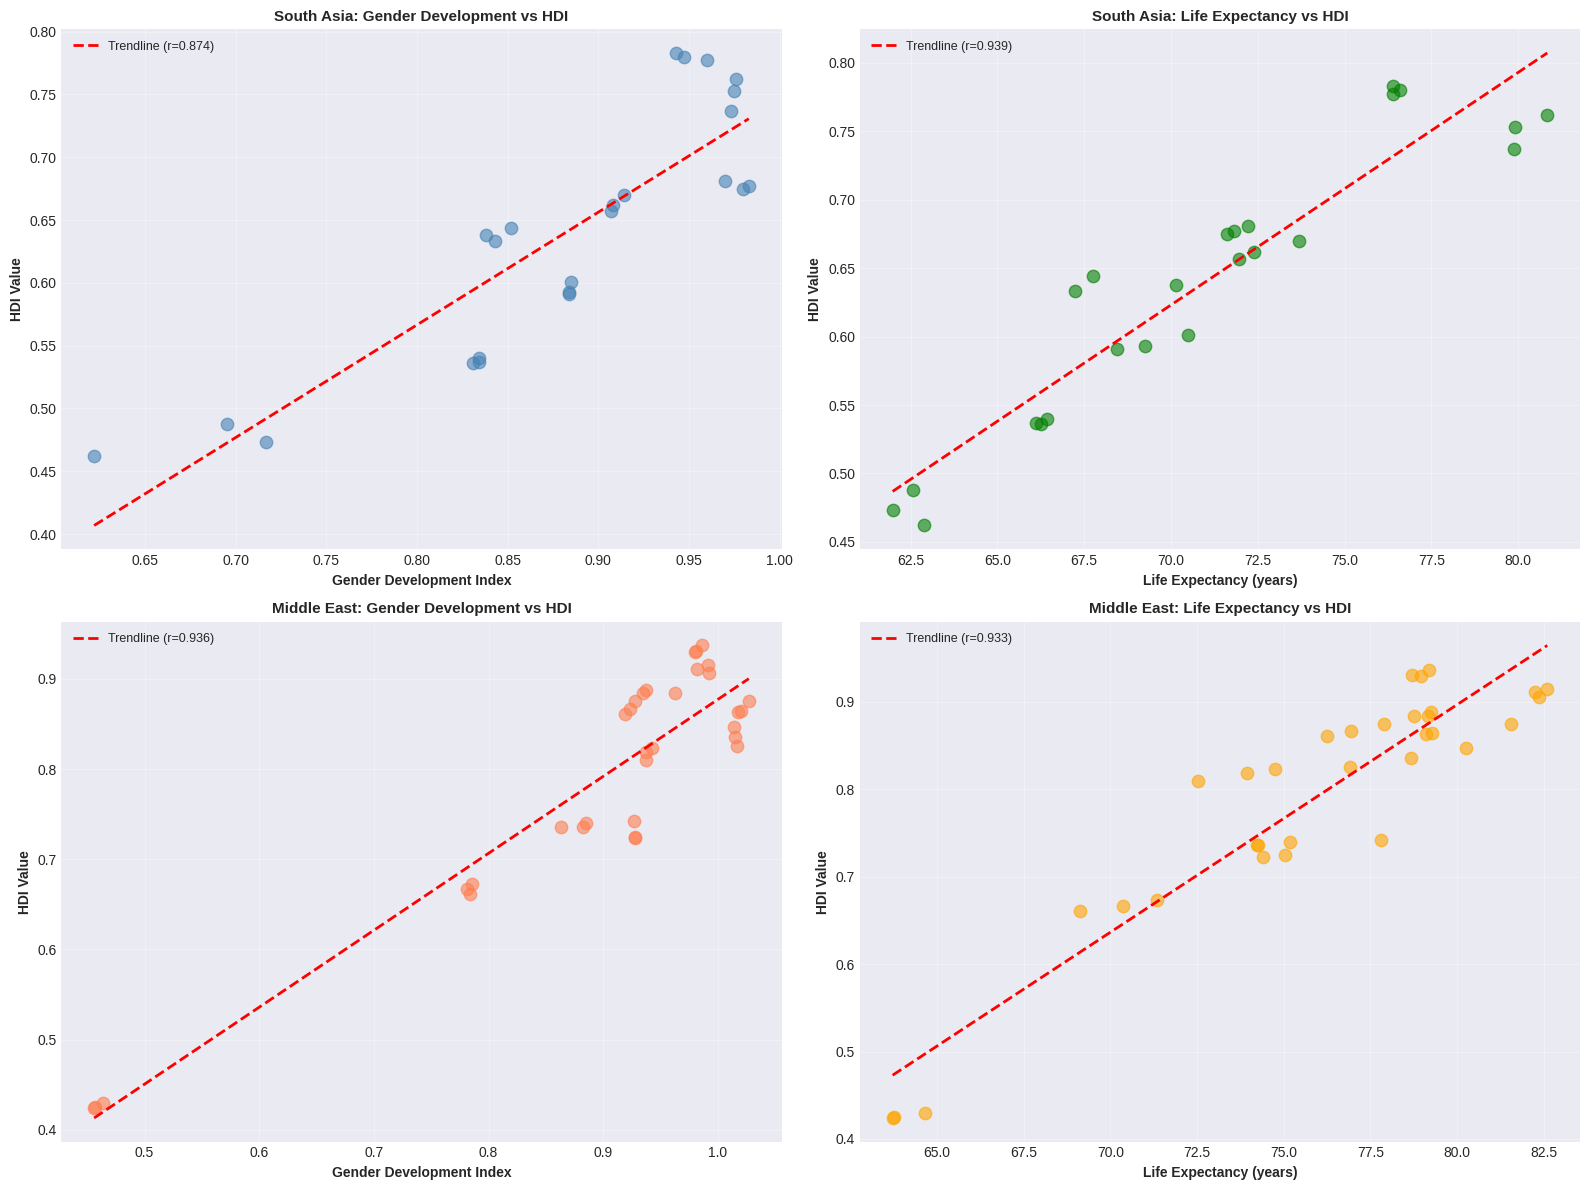

Correlation scatter plots created and saved as 'regional_correlation_analysis.png'


In [ ]:
# Create scatter plots with trendlines for each correlation
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# South Asia: Gender Development vs HDI
sa_data_gender = hdi_south_asia_2020_2022[['hdi', 'gender_development']].dropna()
axes[0, 0].scatter(sa_data_gender['gender_development'], sa_data_gender['hdi'],
                   alpha=0.6, s=80, color='steelblue')
slope, intercept, r, p, std_err = stats.linregress(
    sa_data_gender['gender_development'], sa_data_gender['hdi']
)
x_line = np.linspace(sa_data_gender['gender_development'].min(),
                    sa_data_gender['gender_development'].max(), 100)
y_line = slope * x_line + intercept
axes[0, 0].plot(x_line, y_line, 'r--', linewidth=2, label=f'Trendline (r={r:.3f})')
axes[0, 0].set_xlabel('Gender Development Index', fontsize=10, fontweight='bold')
axes[0, 0].set_ylabel('HDI Value', fontsize=10, fontweight='bold')
axes[0, 0].set_title('South Asia: Gender Development vs HDI', fontsize=11, fontweight='bold')
axes[0, 0].legend(fontsize=9)
axes[0, 0].grid(True, alpha=0.3)

# South Asia: Life Expectancy vs HDI
sa_data_life = hdi_south_asia_2020_2022[['hdi', 'life_expectancy']].dropna()
axes[0, 1].scatter(sa_data_life['life_expectancy'], sa_data_life['hdi'],
                   alpha=0.6, s=80, color='green')
slope, intercept, r, p, std_err = stats.linregress(
    sa_data_life['life_expectancy'], sa_data_life['hdi']
)
x_line = np.linspace(sa_data_life['life_expectancy'].min(),
                    sa_data_life['life_expectancy'].max(), 100)
y_line = slope * x_line + intercept
axes[0, 1].plot(x_line, y_line, 'r--', linewidth=2, label=f'Trendline (r={r:.3f})')
axes[0, 1].set_xlabel('Life Expectancy (years)', fontsize=10, fontweight='bold')
axes[0, 1].set_ylabel('HDI Value', fontsize=10, fontweight='bold')
axes[0, 1].set_title('South Asia: Life Expectancy vs HDI', fontsize=11, fontweight='bold')
axes[0, 1].legend(fontsize=9)
axes[0, 1].grid(True, alpha=0.3)

# Middle East: Gender Development vs HDI
me_data_gender = hdi_middle_east_2020_2022[['hdi', 'gender_development']].dropna()
axes[1, 0].scatter(me_data_gender['gender_development'], me_data_gender['hdi'],
                   alpha=0.6, s=80, color='coral')
slope, intercept, r, p, std_err = stats.linregress(
    me_data_gender['gender_development'], me_data_gender['hdi']
)
x_line = np.linspace(me_data_gender['gender_development'].min(),
                    me_data_gender['gender_development'].max(), 100)
y_line = slope * x_line + intercept
axes[1, 0].plot(x_line, y_line, 'r--', linewidth=2, label=f'Trendline (r={r:.3f})')
axes[1, 0].set_xlabel('Gender Development Index', fontsize=10, fontweight='bold')
axes[1, 0].set_ylabel('HDI Value', fontsize=10, fontweight='bold')
axes[1, 0].set_title('Middle East: Gender Development vs HDI', fontsize=11, fontweight='bold')
axes[1, 0].legend(fontsize=9)
axes[1, 0].grid(True, alpha=0.3)

# Middle East: Life Expectancy vs HDI
me_data_life = hdi_middle_east_2020_2022[['hdi', 'life_expectancy']].dropna()
axes[1, 1].scatter(me_data_life['life_expectancy'], me_data_life['hdi'],
                   alpha=0.6, s=80, color='orange')
slope, intercept, r, p, std_err = stats.linregress(
    me_data_life['life_expectancy'], me_data_life['hdi']
)
x_line = np.linspace(me_data_life['life_expectancy'].min(),
                    me_data_life['life_expectancy'].max(), 100)
y_line = slope * x_line + intercept
axes[1, 1].plot(x_line, y_line, 'r--', linewidth=2, label=f'Trendline (r={r:.3f})')
axes[1, 1].set_xlabel('Life Expectancy (years)', fontsize=10, fontweight='bold')
axes[1, 1].set_ylabel('HDI Value', fontsize=10, fontweight='bold')
axes[1, 1].set_title('Middle East: Life Expectancy vs HDI', fontsize=11, fontweight='bold')
axes[1, 1].legend(fontsize=9)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('regional_correlation_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("Correlation scatter plots created and saved as 'regional_correlation_analysis.png'")


## Task 7: Outlier Detection


In [ ]:
# Task 7: Outlier Detection for each region
# Use 2022 data for consistency
sa_2022 = hdi_south_asia_2020_2022[hdi_south_asia_2020_2022['year'] == 2022][['country', 'hdi', 'gross_inc_percap']].dropna()
me_2022 = hdi_middle_east_2020_2022[hdi_middle_east_2020_2022['year'] == 2022][['country', 'hdi', 'gross_inc_percap']].dropna()

# Detect outliers for South Asia
sa_hdi_outliers, _, _ = detect_outliers_iqr(sa_2022, 'hdi')
sa_gni_outliers, _, _ = detect_outliers_iqr(sa_2022, 'gross_inc_percap')
sa_2022['is_outlier'] = False
if len(sa_hdi_outliers) > 0:
    sa_2022.loc[sa_hdi_outliers.index, 'is_outlier'] = True
if len(sa_gni_outliers) > 0:
    sa_2022.loc[sa_gni_outliers.index, 'is_outlier'] = True

# Detect outliers for Middle East
me_hdi_outliers, _, _ = detect_outliers_iqr(me_2022, 'hdi')
me_gni_outliers, _, _ = detect_outliers_iqr(me_2022, 'gross_inc_percap')
me_2022['is_outlier'] = False
if len(me_hdi_outliers) > 0:
    me_2022.loc[me_hdi_outliers.index, 'is_outlier'] = True
if len(me_gni_outliers) > 0:
    me_2022.loc[me_gni_outliers.index, 'is_outlier'] = True

print("South Asia Outliers (2022):")
if len(sa_2022[sa_2022['is_outlier']]) > 0:
    display(sa_2022[sa_2022['is_outlier']][['country', 'hdi', 'gross_inc_percap']])
else:
    print("No outliers detected")

print("\nMiddle East Outliers (2022):")
if len(me_2022[me_2022['is_outlier']]) > 0:
    display(me_2022[me_2022['is_outlier']][['country', 'hdi', 'gross_inc_percap']])
else:
    print("No outliers detected")


South Asia Outliers (2022):
No outliers detected

Middle East Outliers (2022):


,country,hdi,gross_inc_percap
6368,Yemen,0.424,1105.763435


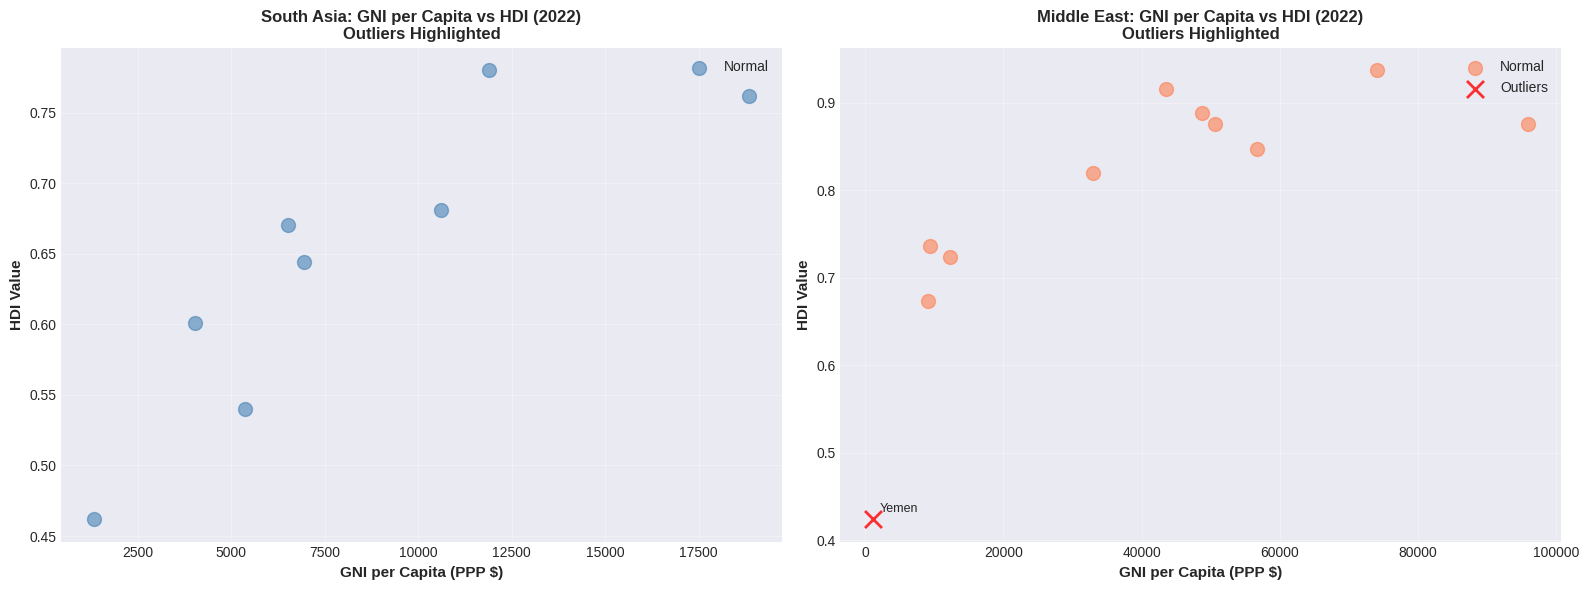

Outlier scatter plots created and saved as 'regional_outliers_scatter.png'

Discussion of Outliers:
Outliers in HDI and GNI per Capita can indicate:
1. Countries with exceptional performance (positive outliers)
2. Countries facing significant challenges (negative outliers)
3. Data quality issues or measurement differences
4. Unique economic or social circumstances


In [ ]:
# Create scatter plots highlighting outliers for each region
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# South Asia scatter plot
sa_normal = sa_2022[~sa_2022['is_outlier']]
sa_outliers = sa_2022[sa_2022['is_outlier']]

axes[0].scatter(sa_normal['gross_inc_percap'], sa_normal['hdi'],
               alpha=0.6, s=100, color='steelblue', label='Normal')
if len(sa_outliers) > 0:
    axes[0].scatter(sa_outliers['gross_inc_percap'], sa_outliers['hdi'],
                   alpha=0.8, s=150, color='red', marker='x', linewidths=2, label='Outliers')
    for idx, row in sa_outliers.iterrows():
        axes[0].annotate(row['country'], (row['gross_inc_percap'], row['hdi']),
                        xytext=(5, 5), textcoords='offset points', fontsize=9)

axes[0].set_xlabel('GNI per Capita (PPP $)', fontsize=11, fontweight='bold')
axes[0].set_ylabel('HDI Value', fontsize=11, fontweight='bold')
axes[0].set_title('South Asia: GNI per Capita vs HDI (2022)\nOutliers Highlighted',
                 fontsize=12, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

# Middle East scatter plot
me_normal = me_2022[~me_2022['is_outlier']]
me_outliers = me_2022[me_2022['is_outlier']]

axes[1].scatter(me_normal['gross_inc_percap'], me_normal['hdi'],
               alpha=0.6, s=100, color='coral', label='Normal')
if len(me_outliers) > 0:
    axes[1].scatter(me_outliers['gross_inc_percap'], me_outliers['hdi'],
                   alpha=0.8, s=150, color='red', marker='x', linewidths=2, label='Outliers')
    for idx, row in me_outliers.iterrows():
        axes[1].annotate(row['country'], (row['gross_inc_percap'], row['hdi']),
                        xytext=(5, 5), textcoords='offset points', fontsize=9)

axes[1].set_xlabel('GNI per Capita (PPP $)', fontsize=11, fontweight='bold')
axes[1].set_ylabel('HDI Value', fontsize=11, fontweight='bold')
axes[1].set_title('Middle East: GNI per Capita vs HDI (2022)\nOutliers Highlighted',
                 fontsize=12, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('regional_outliers_scatter.png', dpi=300, bbox_inches='tight')
plt.show()

print("Outlier scatter plots created and saved as 'regional_outliers_scatter.png'")

# Discuss significance of outliers
print("\nDiscussion of Outliers:")
print("Outliers in HDI and GNI per Capita can indicate:")
print("1. Countries with exceptional performance (positive outliers)")
print("2. Countries facing significant challenges (negative outliers)")
print("3. Data quality issues or measurement differences")
print("4. Unique economic or social circumstances")
